In [1]:
import pandas, seaborn, scipy, numpy, matplotlib, collections, sklearn, math

%matplotlib inline
from matplotlib import pyplot
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


# Constants
library_sizes = {
    'WGS': 3002000000,
    'WES': 50160183,
}
mhc_binding_threshold_affinity = 500



%matplotlib inline
%config InlineBackend.figure_format = 'png'

matplotlib.rc("savefig", dpi=800)
#matplotlib.rc("savefig", dpi=72)
matplotlib.rc('text', usetex=True)
#reload(c)

pandas.set_option('display.max_rows', 500)
pandas.set_option('display.max_columns', 500)

def print_full(x):
    pandas.set_option('display.max_rows', len(x))
    print(x)
    pandas.reset_option('display.max_rows')
    
def bootstrap(values, statistic=numpy.mean, samples=5000):
    values = pandas.Series(values).dropna()
    if len(values) <= 1:
        return (numpy.nan, numpy.nan)
    values = [statistic(sklearn.utils.resample(values)) for i in range(samples)]
    return (numpy.percentile(values, 5), numpy.percentile(values, 95))

def round_to_n(x, n):
    return round(x, -int(math.floor(math.log10(x))) + (n - 1)) 

def mean_with_errorbars(values, decimals=0):
    pattern = "%%0.%df" % decimals
    bars = bootstrap(values)
    if numpy.nan in bars:
        return pattern % numpy.mean(values)
    if decimals == 0:
        bars = (round_to_n(bars[0], 2), round_to_n(bars[1], 2)) 
    return (pattern + " (" + pattern + " - " + pattern + ")") % ((numpy.mean(values),) + bars)


/Users/tim/miniconda3/envs/py3k/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
sources = pandas.read_csv("../data/derived/sources.full.csv", index_col="source_id")


In [3]:
df = pandas.read_csv("../data/derived/deconstructsigs_output.csv", index_col=0)
df.columns = [x.replace(".", " ").replace("  ", " ") for x in df.columns]
df["kind"] = [x.split()[-1] for x in df.Sample]
df["source_id"] = [x.split()[0] for x in df.Sample]
del df["Sample"]
df = df.set_index(["source_id", "kind"], drop=False)
df = df.loc[:,(df != 0).any(axis=0)]
signatures = sorted([x for x in df.columns if x not in ('kind', 'source_id')], key=lambda x: x[0])
df["treated"] = [sources.ix[s].treated if s in sources.index else False for s in df.source_id]
df.to_csv("../data/derived/deconstructsigs_output.cleaned.csv")
df

Signature 1  Signature 2  Signature 3  Signature 4  \
source_id     kind                                                       
AOCS-166-1-2  all      0.000000     0.000000     0.000000     0.000000   
AOCS-092-3-3  new      0.000000     0.000000     0.173333     0.000000   
AOCS-064-3-3  new      0.000000     0.000000     0.512506     0.000000   
AOCS-064-1-6  all      0.000000     0.003423     0.428518     0.000000   
AOCS-064-3-3  all      0.000000     0.004057     0.476215     0.000000   
AOCS-139-19-0 new      0.000000     0.008265     0.489320     0.000000   
AOCS-119-3-9  all      0.000000     0.008636     0.260254     0.000000   
AOCS-093-3-6  new      0.000000     0.025292     0.467042     0.000000   
AOCS-088-3-8  new      0.000000     0.055241     0.385917     0.000000   
AOCS-034-3-8  new      0.007634     0.041865     0.381169     0.000000   
AOCS-088-3-8  all      0.008323     0.037319     0.369055     0.000000   
AOCS-086-3-2  new      0.015515     0.000000     0.435691     0.000000   
AOCS-137-3-7  new      0.016137     0.000000     0.578405     0.000000   
AOCS-091-1-3  all      0.017110     0.007990     0.516002     0.000000   
AOCS-095-3-1  new      0.021304     0.000000     0.443105     0.000000   
AOCS-091-3-0  new      0.023119     0.000000     0.527736     0.000000   
AOCS-155-3-5  all      0.025644     0.013027     0.448770     0.000000   
AOCS-094-6-X  new      0.025926     0.002917     0.523237     0.000000   
AOCS-150-3-1  all      0.026929     0.003161     0.369160     0.000000   
AOCS-158-1-6  all      0.033793     0.005518     0.442782     0.000000   
AOCS-150-8-X  all      0.034918     0.009651     0.466655     0.000000   
AOCS-088-1-0  all      0.038741     0.000000     0.347385     0.000000   
AOCS-139-12-5 new      0.039813     0.017134     0.473654     0.000000   
AOCS-095-3-1  all      0.042758     0.001633     0.409266     0.000000   
AOCS-139-19-0 all      0.044201     0.011156     0.488808     0.000000   
AOCS-034-3-8  all      0.044497     0.034413     0.493021     0.000000   
AOCS-065-3-6  new      0.045337     0.000000     0.573553     0.000000   
AOCS-148-1-4  all      0.046769     0.026446     0.403727     0.006888   
AOCS-094-1-1  all      0.049079     0.000000     0.580538     0.000000   
AOCS-139-6-3  new      0.049096     0.018872     0.506944     0.000000   
AOCS-125-1-2  all      0.049102     0.007311     0.352214     0.000000   
AOCS-107-1-4  all      0.050302     0.011397     0.422277     0.000000   
AOCS-086-3-2  all      0.050795     0.007572     0.526141     0.000000   
AOCS-146-1-9  all      0.053096     0.010768     0.455554     0.023457   
AOCS-092-3-3  all      0.055025     0.006622     0.371879     0.000000   
AOCS-120-3-6  all      0.055088     0.004245     0.572955     0.000000   
AOCS-093-3-6  all      0.056296     0.019890     0.609819     0.000000   
AOCS-091-3-0  all      0.056399     0.001993     0.545424     0.000000   
AOCS-167-16-X all      0.056732     0.011923     0.486731     0.000000   
AOCS-131-1-3  all      0.056818     0.050679     0.429306     0.031089   
AOCS-122-1-4  all      0.057193     0.016594     0.409916     0.000000   
AOCS-135-8-X  all      0.057324     0.013715     0.310049     0.000000   
AOCS-138-3-X  all      0.057807     0.009254     0.477926     0.000000   
AOCS-147-1-1  all      0.058624     0.100624     0.361833     0.000000   
AOCS-135-3-1  all      0.059865     0.021388     0.271619     0.000000   
AOCS-128-1-0  all      0.060095     0.038546     0.387467     0.043867   
AOCS-004-1-5  all      0.060413     0.028655     0.339972     0.000000   
AOCS-171-1-0  all      0.061139     0.000000     0.508844     0.000000   
AOCS-095-1-4  all      0.061866     0.014554     0.429928     0.000000   
AOCS-167-3-2  all      0.062040     0.009978     0.428951     0.000000   
AOCS-139-12-5 all      0.062355     0.020126     0.469237     0.000000   
AOCS-137-3-7  all      0.063279     0.004669     0.485444     0.000000   
AOCS-094-6-X  all      0

In [4]:
df.ix[df.kind == "control"]
df.kind.unique()

array(['all', 'new'], dtype=object)

In [5]:
df.sum()

Signature 1                                                                 12.9976
Signature 2                                                                 2.23256
Signature 3                                                                 47.6939
Signature 4                                                                 0.33613
Signature 5                                                                 8.25482
Signature 6                                                                0.557678
Signature 7                                                                0.197239
Signature 8                                                                 22.9042
Signature 9                                                                 2.55657
Signature 10                                                               0.123363
Signature 11                                                                1.25261
Signature 12                                                                

In [6]:
pandas.read_csv("../data/derived/deconstructsigs_output.csv", index_col=0).sum()

Signature.1                                                                  12.9976
Signature.2                                                                  2.23256
Signature.3                                                                  47.6939
Signature.4                                                                  0.33613
Signature.5                                                                  8.25482
Signature.6                                                                 0.557678
Signature.7                                                                 0.197239
Signature.8                                                                  22.9042
Signature.9                                                                  2.55657
Signature.10                                                                0.123363
Signature.11                                                                 1.25261
Signature.12                                                     

In [7]:
def make_draw_df(draw_df):
    signature_descriptions = {
        1: 'Age',
        3: 'BRCA',
        4: 'Smoking',
        6: 'MMR',
        9: 'AID',
        10: 'POLE',
        13: 'AID',
        #22: 'Arist.',
        26: 'MMR',
        29: 'Tobacco',
    }
    column_renames = {
        'Cisplatin Gallus gallus': "Cisplatin \\textit{Gallus gallus}",
        'Chicken cyclophosphamide': 'Cyc.',
        'Chicken etoposide': 'Etoposide',
    }
    column_renames.update(
        dict(("Signature %d" % num, ("(%d) %s" % (num, signature_descriptions.get(num, ''))).strip())
                  for num in range(35)))
    '''
    if 'treated' in draw_df.columns:
        draw_df["treated"] = (draw_df.treated == True).astype(float)
        draw_df["unique"] = (draw_df.kind == "new").astype(float)
        draw_df["control"] = (draw_df.kind == "check").astype(float)
        draw_df = draw_df[["treated", "unique", "control"] + signatures]
    else:
        draw_df = draw_df[signatures]
    '''

    draw_df.index = [x[0] for x in draw_df.index]
    draw_df = draw_df.ix[sorted(draw_df.index)]
    draw_df.columns = [
        column_renames.get(x, x)
        .replace("Gallus gallus", "\\textit{G. gallus}")
        .replace("Gallus gallus", "\\textit{G. gallus}")
        .replace("C Elegans", "\\textit{C. Elegans}")
        .replace("fcd 2", "\\textit{fcd-2$^-$}")
        .replace("xpf 1", "\\textit{xpf-1$^-$}")
        .replace("slx 1", "\\textit{slx-1$^-$}")
        .replace("polq 1", "\\textit{polq-1$^-$}")
        for x in draw_df.columns
    ]
    return draw_df

In [8]:
treatments_df = pandas.read_csv("../data/external/treatments.csv").dropna()
donor_to_treatments = collections.defaultdict(set)
for (i, row) in treatments_df.iterrows():
    donor_to_treatments[row.submitted_donor_id].add(row["DRUG NAME"])
counts = treatments_df["DRUG NAME"].value_counts()
donor_to_treatments = dict(
    (key, sorted(value, key=counts.get, reverse=True))
     for (key, value) in donor_to_treatments.items())
donor_to_treatments

donors = sorted(sources.donor)
counts = treatments_df["DRUG NAME"].value_counts()
treatment_matrix_df = pandas.DataFrame(
    collections.OrderedDict(
        (drug, [
                row.treated and drug in donor_to_treatments.get(row.donor, []) for (_, row) in sources.iterrows()
        ]) for drug in counts.index),
    index=sources.index)
treatment_matrix_df.to_csv("../data/derived/treatments_matrix.csv")
treatment_matrix_df

carboplatin paclitaxel liposomal doxorubicin gemcitabine  \
source_id                                                                
AOCS-001-1-7        False      False                 False       False   
AOCS-004-1-5        False      False                 False       False   
AOCS-005-1-8        False      False                 False       False   
AOCS-034-1-0        False      False                 False       False   
AOCS-034-3-8         True       True                  True        True   
AOCS-055-1-7        False      False                 False       False   
AOCS-056-1-X        False      False                 False       False   
AOCS-057-1-2        False      False                 False       False   
AOCS-058-1-5        False      False                 False       False   
AOCS-059-1-8        False      False                 False       False   
AOCS-060-1-5        False      False                 False       False   
AOCS-061-1-8        False      False                 False       False   
AOCS-063-1-3        False      False                 False       False   
AOCS-064-1-6        False      False                 False       False   
AOCS-064-3-3         True       True                  True        True   
AOCS-065-1-9        False      False                 False       False   
AOCS-065-3-6         True       True                  True       False   
AOCS-075-1-0        False      False                 False       False   
AOCS-076-1-3        False      False                 False       False   
AOCS-077-1-6         True       True                 False       False   
AOCS-078-1-9        False      False                 False       False   
AOCS-079-1-1        False      False                 False       False   
AOCS-080-1-9        False      False                 False       False   
AOCS-081-1-1        False      False                 False       False   
AOCS-083-1-7        False      False                 False       False   
AOCS-084-1-X        False      False                 False       False   
AOCS-085-1-2        False      False                 False       False   
AOCS-086-1-5        False      False                 False       False   
AOCS-086-3-2         True       True                  True        True   
AOCS-088-1-0        False      False                 False       False   
AOCS-088-3-8         True       True                 False        True   
AOCS-090-1-0        False      False                 False       False   
AOCS-091-1-3        False      False                 False       False   
AOCS-091-3-0         True       True                  True        True   
AOCS-092-1-6        False      False                 False       False   
AOCS-092-3-3         True       True                  True        True   
AOCS-093-1-9        False      False                 False       False   
AOCS-093-3-6         True       True                 False       False   
AOCS-093-8-4        False      False                 False       False   
AOCS-094-1-1        False      False                 False       False   
AOCS-094-6-X         True       True                  True       False   
AOCS-095-1-4        False      False                 False       False   
AOCS-095-3-1         True       True                  True        True   
AOCS-096-1-7        False      False                 False       False   
AOCS-097-1-X        False      False                 False       False   
AOCS-104-1-6        False      False                 False       False   
AOCS-105-1-9        False      False                 False       False   
AOCS-106-1-1         True       True                 False       False   
AOCS-107-1-4        False      False                 False       False   
AOCS-108-1-7        False      False                 False       False   
AOCS-109-1-X        False      False                 False       False   
AOCS-111-1-X        False      False                 False       False   
AOCS-112-1-2      

In [9]:
signatures

['Cisplatin Gallus gallus',
 'Cyclophosphamide Gallus gallus',
 'Cisplatin C Elegans',
 'Etoposide Gallus gallus',
 'Signature 1',
 'Signature 2',
 'Signature 3',
 'Signature 4',
 'Signature 5',
 'Signature 6',
 'Signature 7',
 'Signature 8',
 'Signature 9',
 'Signature 10',
 'Signature 11',
 'Signature 12',
 'Signature 13',
 'Signature 14',
 'Signature 15',
 'Signature 16',
 'Signature 17',
 'Signature 18',
 'Signature 19',
 'Signature 20',
 'Signature 21',
 'Signature 22',
 'Signature 23',
 'Signature 24',
 'Signature 25',
 'Signature 26',
 'Signature 27',
 'Signature 28',
 'Signature 29',
 'Signature 30']

In [10]:
symbols = {
    'exact': '$*$',
    'partial': '$?$',
    'mismatch': '$?$',
}

def make_symbol_labels(sigs, percent_cutoff, treats):
    result = []
    for (col_num, signature) in enumerate(sigs.columns):
        cisplatin_sig = 'cisplatin' in signature.lower()
        cyc_sig = 'cyclophosphamide' in signature.lower()
        etoposide_sig = 'etoposide' in signature.lower()
        for (row_num, sample) in enumerate(sigs[signature].index):
            if sigs[signature][sample] > percent_cutoff / 100.0:
                sample_treatments = set(treats.columns[treats.ix[sample]])
                symbol = None
                if cisplatin_sig:
                    if "cisplatin" in sample_treatments:
                        symbol = symbols["exact"]
                    elif any('platin' in t for t in sample_treatments):
                        symbol = symbols["partial"]
                    else:
                        symbol = symbols["mismatch"]
                if cyc_sig:
                    if 'cyclophosphamide' in sample_treatments:
                        symbol = symbols["exact"]
                    else:
                        symbol = symbols["mismatch"]
                if etoposide_sig:
                    if 'etoposide' in sample_treatments:
                        symbol = symbols["exact"]
                    else:
                        symbol = symbols["mismatch"]
                if symbol is not None:
                    result.append((row_num, col_num, symbol))   
    return result

def draw_from_chunks(chunks, figsize, cbar=True, cbar_bbox_to_anchor=(-0.125, 7.25, 1.05, 0.95), symbols=False, small_fontsize=4, extra_signature_vlines=[], binarize=False, percent_cutoff=0, vmax=1, symbol_text_kwargs={}):
    col_removes = [col for col in chunks[0][1].columns if all(c[col].sum() == 0 for (_, c) in chunks)]
    print("Removing columns: %s" % ', '.join(col_removes))
    for col in col_removes:
        for (_, chunk) in chunks:
            del chunk[col]
    
    signatures = sorted(
        [c for c in chunks[0][1].columns if c not in ('source_id', 'treated', 'unique', 'control', 'kind')],
        key=lambda x: ('Signature' in x))
    
    seaborn.set_context('paper')
    seaborn.set_style('white')
    
    fig = pyplot.figure(figsize=figsize)
    gs = list(matplotlib.gridspec.GridSpec(
            len(chunks),
            2,
            width_ratios=[len(treatment_matrix_df.columns), len(signatures)],
            height_ratios=[len(x[1]) for x in chunks] + [2]))
    print(gs)
    gs_pairs = []
    while gs:
        gs_pairs.append((gs.pop(0), gs.pop(0)))

    prev_axs = []
    for (i, ((label, chunk), (left_spec, right_spec))) in enumerate(zip(chunks, gs_pairs)):
        draw_chunk = make_draw_df(chunk[signatures])
        sub_treatment_matrix_df = treatment_matrix_df.ix[draw_chunk.index]
        axs = []

        # Left
        if i != 0:
            ax = pyplot.subplot(left_spec, sharex=prev_axs[-1][0] if i > 1 else None)
            heatmap = ax.imshow(
                sub_treatment_matrix_df.values.astype(float),
                cmap=pyplot.cm.Reds,
                origin='upper',
                interpolation='nearest',
                aspect='auto',
                vmin=0,
                vmax=1)

            if i == 1:
                ax.xaxis.tick_top()
                ax.xaxis.set_label_position('top') 
                ax.set_xticks(numpy.arange(sub_treatment_matrix_df.shape[1])+0.0, minor=False)
                ax.set_xticklabels(sub_treatment_matrix_df.columns, minor=False, rotation=90, fontsize=small_fontsize + 2)
                pyplot.xlabel("Treatment", fontsize=small_fontsize + 2)
            else:
                ax.axes.get_xaxis().set_visible(False)

            ax.axes.get_yaxis().set_visible(False)

            for v in range(sub_treatment_matrix_df.shape[1]):
                ax.axvline(v + .5, color='gray', lw=.10)

        else:
            ax = None
        axs.append(ax)

        # Right
        ax = pyplot.subplot(right_spec, sharex=prev_axs[-1][1] if prev_axs else None, sharey=ax)
        axs.append(ax)
        
        values = draw_chunk.values
        if percent_cutoff:
            values = numpy.vectorize(lambda v: v if v > percent_cutoff / 100.0 else 0.0)(values)
        if binarize:
            values = (values > 0).astype(float)

        heatmap = ax.imshow(
            values,
            cmap=pyplot.cm.Blues,
            interpolation='nearest',
            aspect='auto',
            origin='upper',
            vmin=0,
            vmax=vmax)

        if i == 0:
            ax.xaxis.tick_top()
            ax.xaxis.set_label_position('top') 

            ax.set_xticks(numpy.arange(draw_chunk.shape[1])+0.0, minor=False)
            ax.set_xticklabels(draw_chunk.columns, minor=False, rotation=90, fontsize=small_fontsize + 2)
            pyplot.xlabel("Mutational Signature", fontsize=small_fontsize + 2)
        else:
            ax.axes.get_xaxis().set_visible(False)

        for v in range(draw_chunk.shape[1]):
            ax.axvline(v + .5, color='gray', lw=.10)

        ax.yaxis.tick_right()
        ax.yaxis.set_label_position('right') 
        ax.set_yticks(numpy.arange(draw_chunk.shape[0])+0.0, minor=False)
        ax.set_yticklabels([x.split("/")[0] for x in draw_chunk.index], minor=False, fontsize=small_fontsize, ha='left')
        yax = ax.get_yaxis()
        yax.set_tick_params(pad=3.0)
        pyplot.ylabel(label, fontsize=small_fontsize + 2)
        
        if symbols:
            symbol_labels = make_symbol_labels(draw_chunk, percent_cutoff, sub_treatment_matrix_df)
            for (row_pos, col_pos, symbol) in symbol_labels:
                ax.text(col_pos, row_pos, symbol, va='center', ha='center', fontsize=small_fontsize, **symbol_text_kwargs)
        
        for v in extra_signature_vlines:
            ax.axvline(v + .5, color='black', lw=1.0)

        # Common:
        for ax in axs:
            if ax is not None:
                for v in range(draw_chunk.shape[0]):
                    ax.axhline(v + .5, color='gray', lw=.10)
        

        prev_axs.append(axs)

    # See http://stackoverflow.com/questions/18856069/how-to-shrink-a-subplot-colorbar
    if cbar:
        base_ax = prev_axs[-1][0]
        cax = inset_axes(base_ax,
                         width="70%",
                         height="10%",
                         bbox_transform=base_ax.transAxes,
                         bbox_to_anchor=cbar_bbox_to_anchor,
                         loc=1)

        from matplotlib.ticker import FuncFormatter
        
        @FuncFormatter
        def formatter(value, pos):
            if value == vmax and values.max() > vmax:
                return r"$>%0.0f$" % (value * 100.0)
            return "$%0.0f$" % (value * 100.0)
        
        cbar = fig.colorbar(heatmap, cax=cax, orientation='horizontal',
                            ticks=numpy.linspace(0, vmax, 3), format=formatter)
        cbar.ax.set_title("Percent of SNVs\nattributed to signature", fontsize=small_fontsize + 2)
    return prev_axs



Removing columns: 
[<matplotlib.gridspec.SubplotSpec object at 0x10961f978>, <matplotlib.gridspec.SubplotSpec object at 0x10961f208>, <matplotlib.gridspec.SubplotSpec object at 0x10961f438>, <matplotlib.gridspec.SubplotSpec object at 0x10961fcc0>, <matplotlib.gridspec.SubplotSpec object at 0x10961f518>, <matplotlib.gridspec.SubplotSpec object at 0x10961f0b8>]


/Users/tim/miniconda3/envs/py3k/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


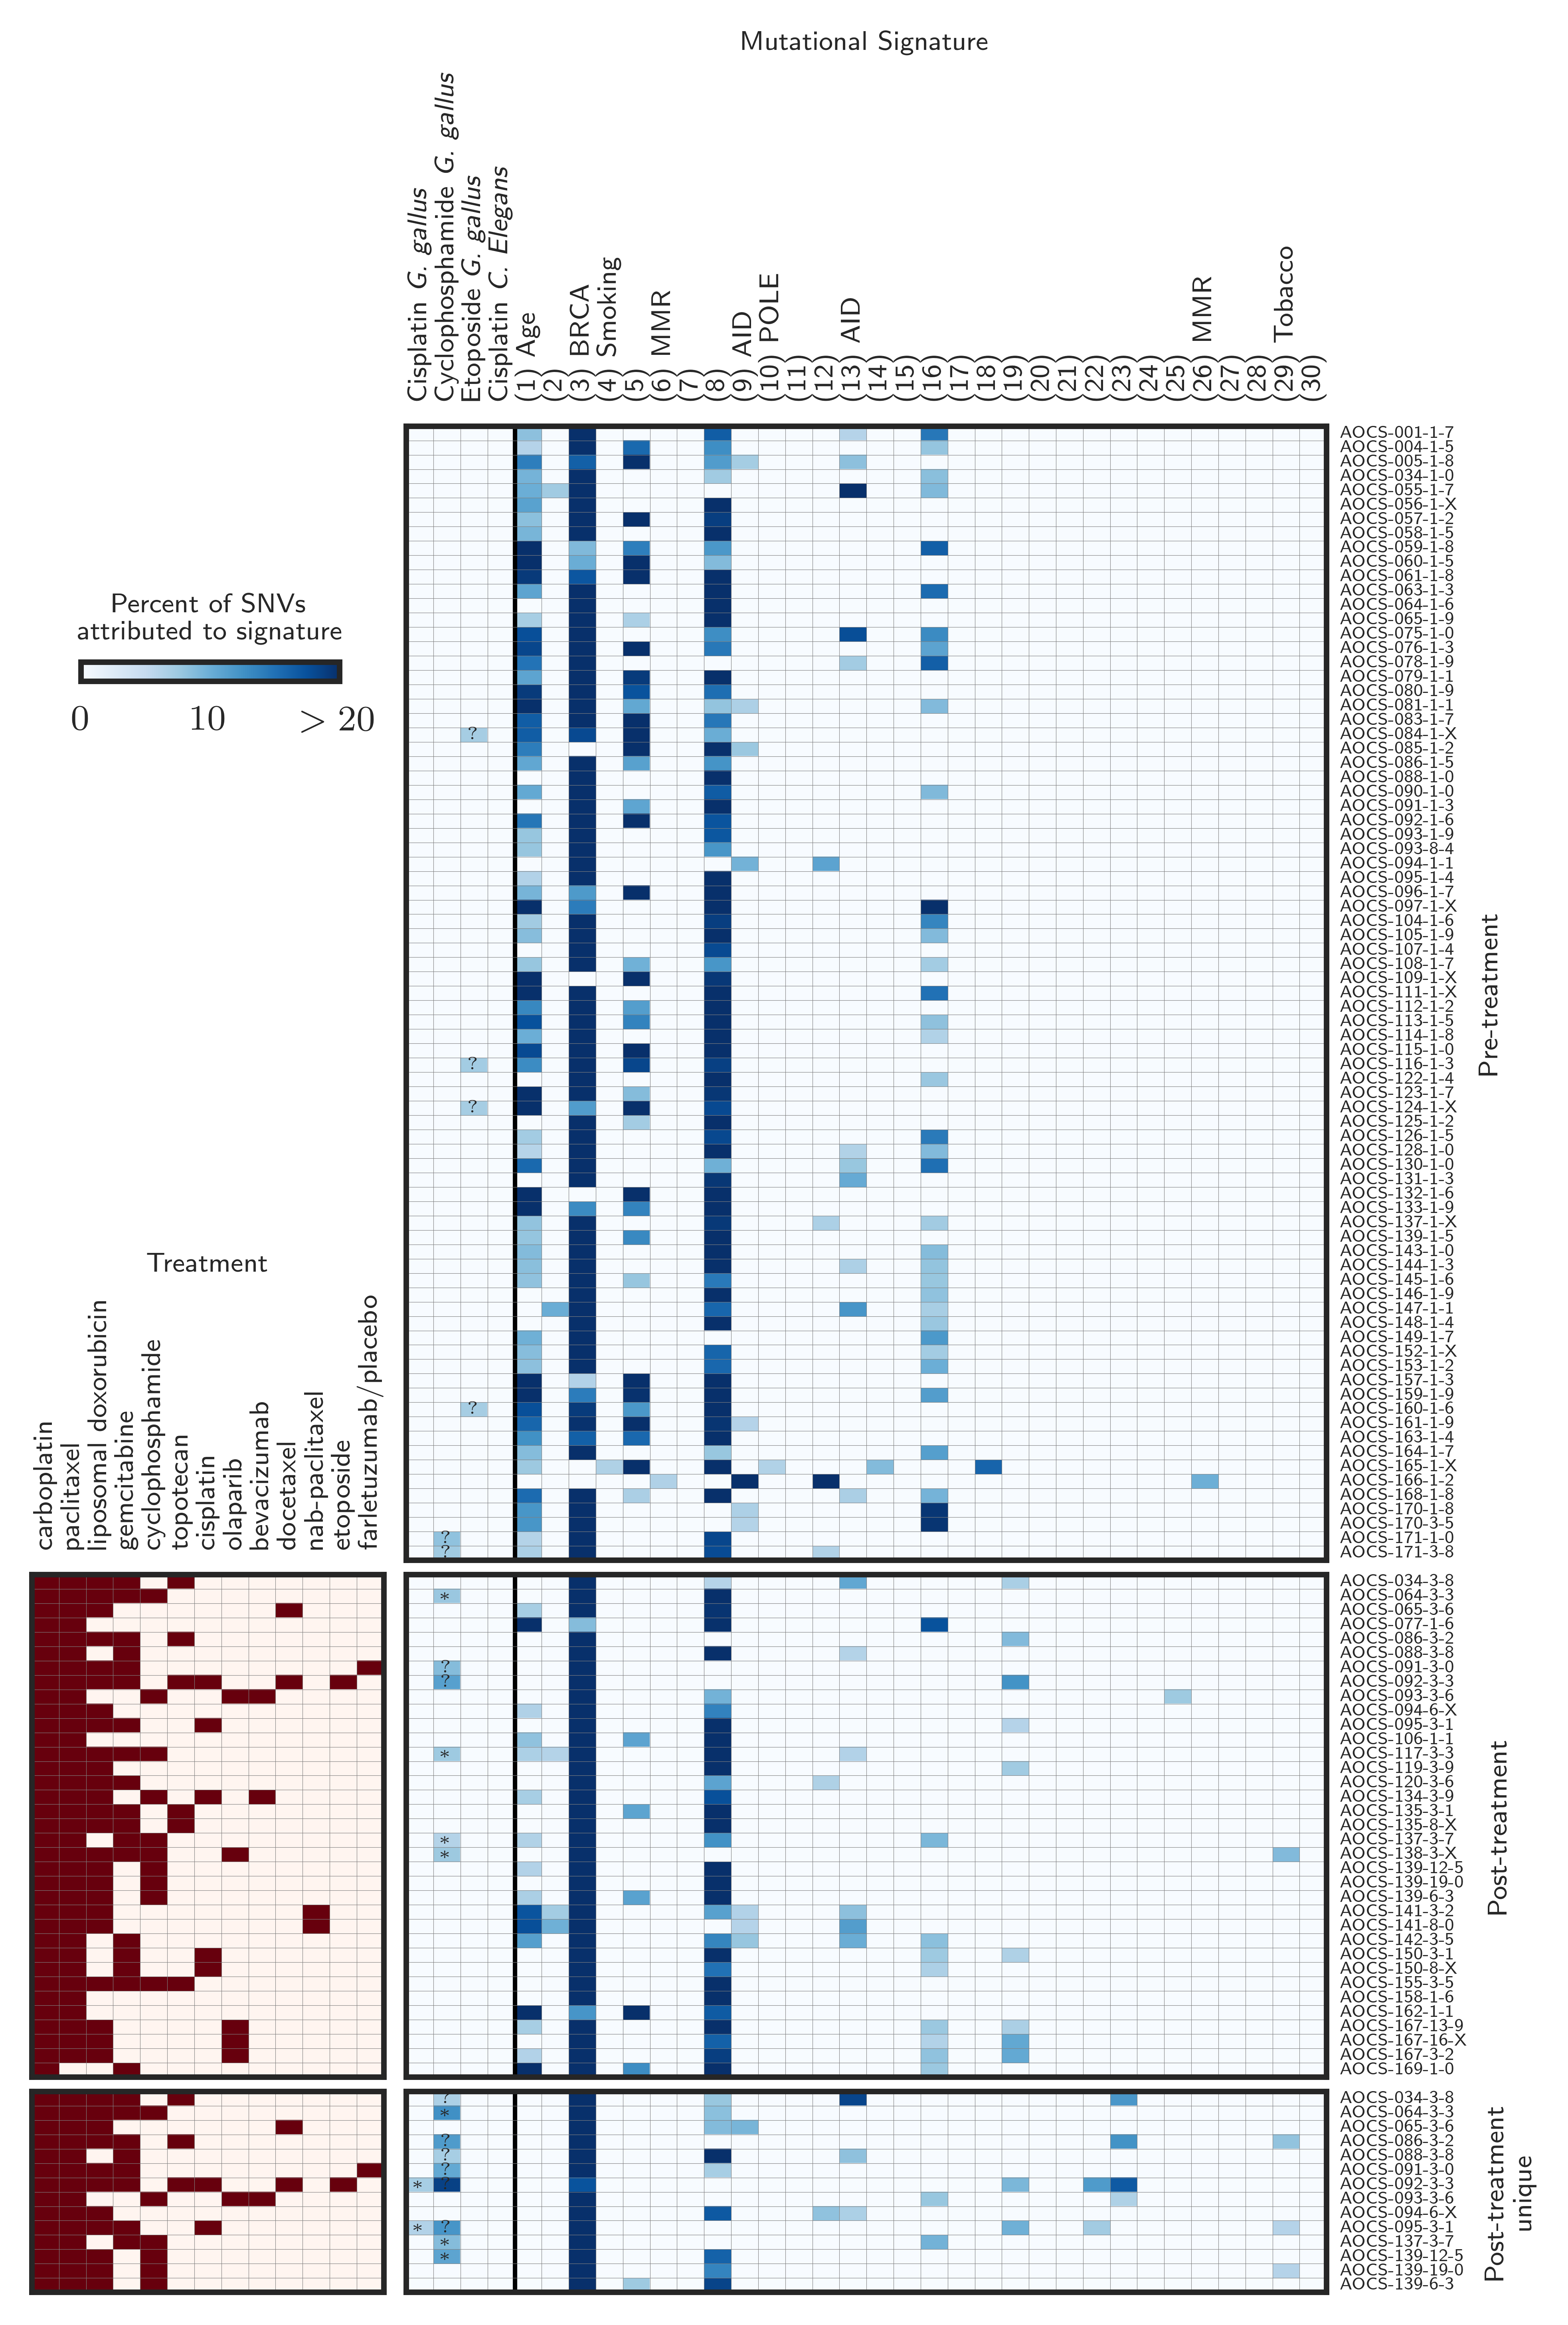

In [11]:
axs = draw_from_chunks([
#    ("Control", df.ix[(df.kind == "check")]),
    ("Pre-treatment", df.ix[(df.kind == "all") & (~df.treated)]),
    ("Post-treatment", (df.ix[(df.kind == "all") & (df.treated)])),
    ("Post-treatment\nunique", (df.ix[(df.kind == "new")]))
], figsize=(5,7.5), symbols=True, percent_cutoff=6.0, vmax=0.2, extra_signature_vlines=[3])
pyplot.tight_layout(h_pad=-7.2, w_pad=0.5)

pyplot.savefig("../figures/supplementary_signatures.pdf")

In [12]:
df.ix[(df.kind == 'all') & (~df.treated)].shape
df.ix[(df.kind == 'all') & (df.treated)].shape

(35, 37)

Removing columns: 
[<matplotlib.gridspec.SubplotSpec object at 0x1297b5518>, <matplotlib.gridspec.SubplotSpec object at 0x1297b5588>, <matplotlib.gridspec.SubplotSpec object at 0x1297b55c0>, <matplotlib.gridspec.SubplotSpec object at 0x1297b5630>, <matplotlib.gridspec.SubplotSpec object at 0x1297b5668>, <matplotlib.gridspec.SubplotSpec object at 0x1297b56d8>]


/Users/tim/miniconda3/envs/py3k/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


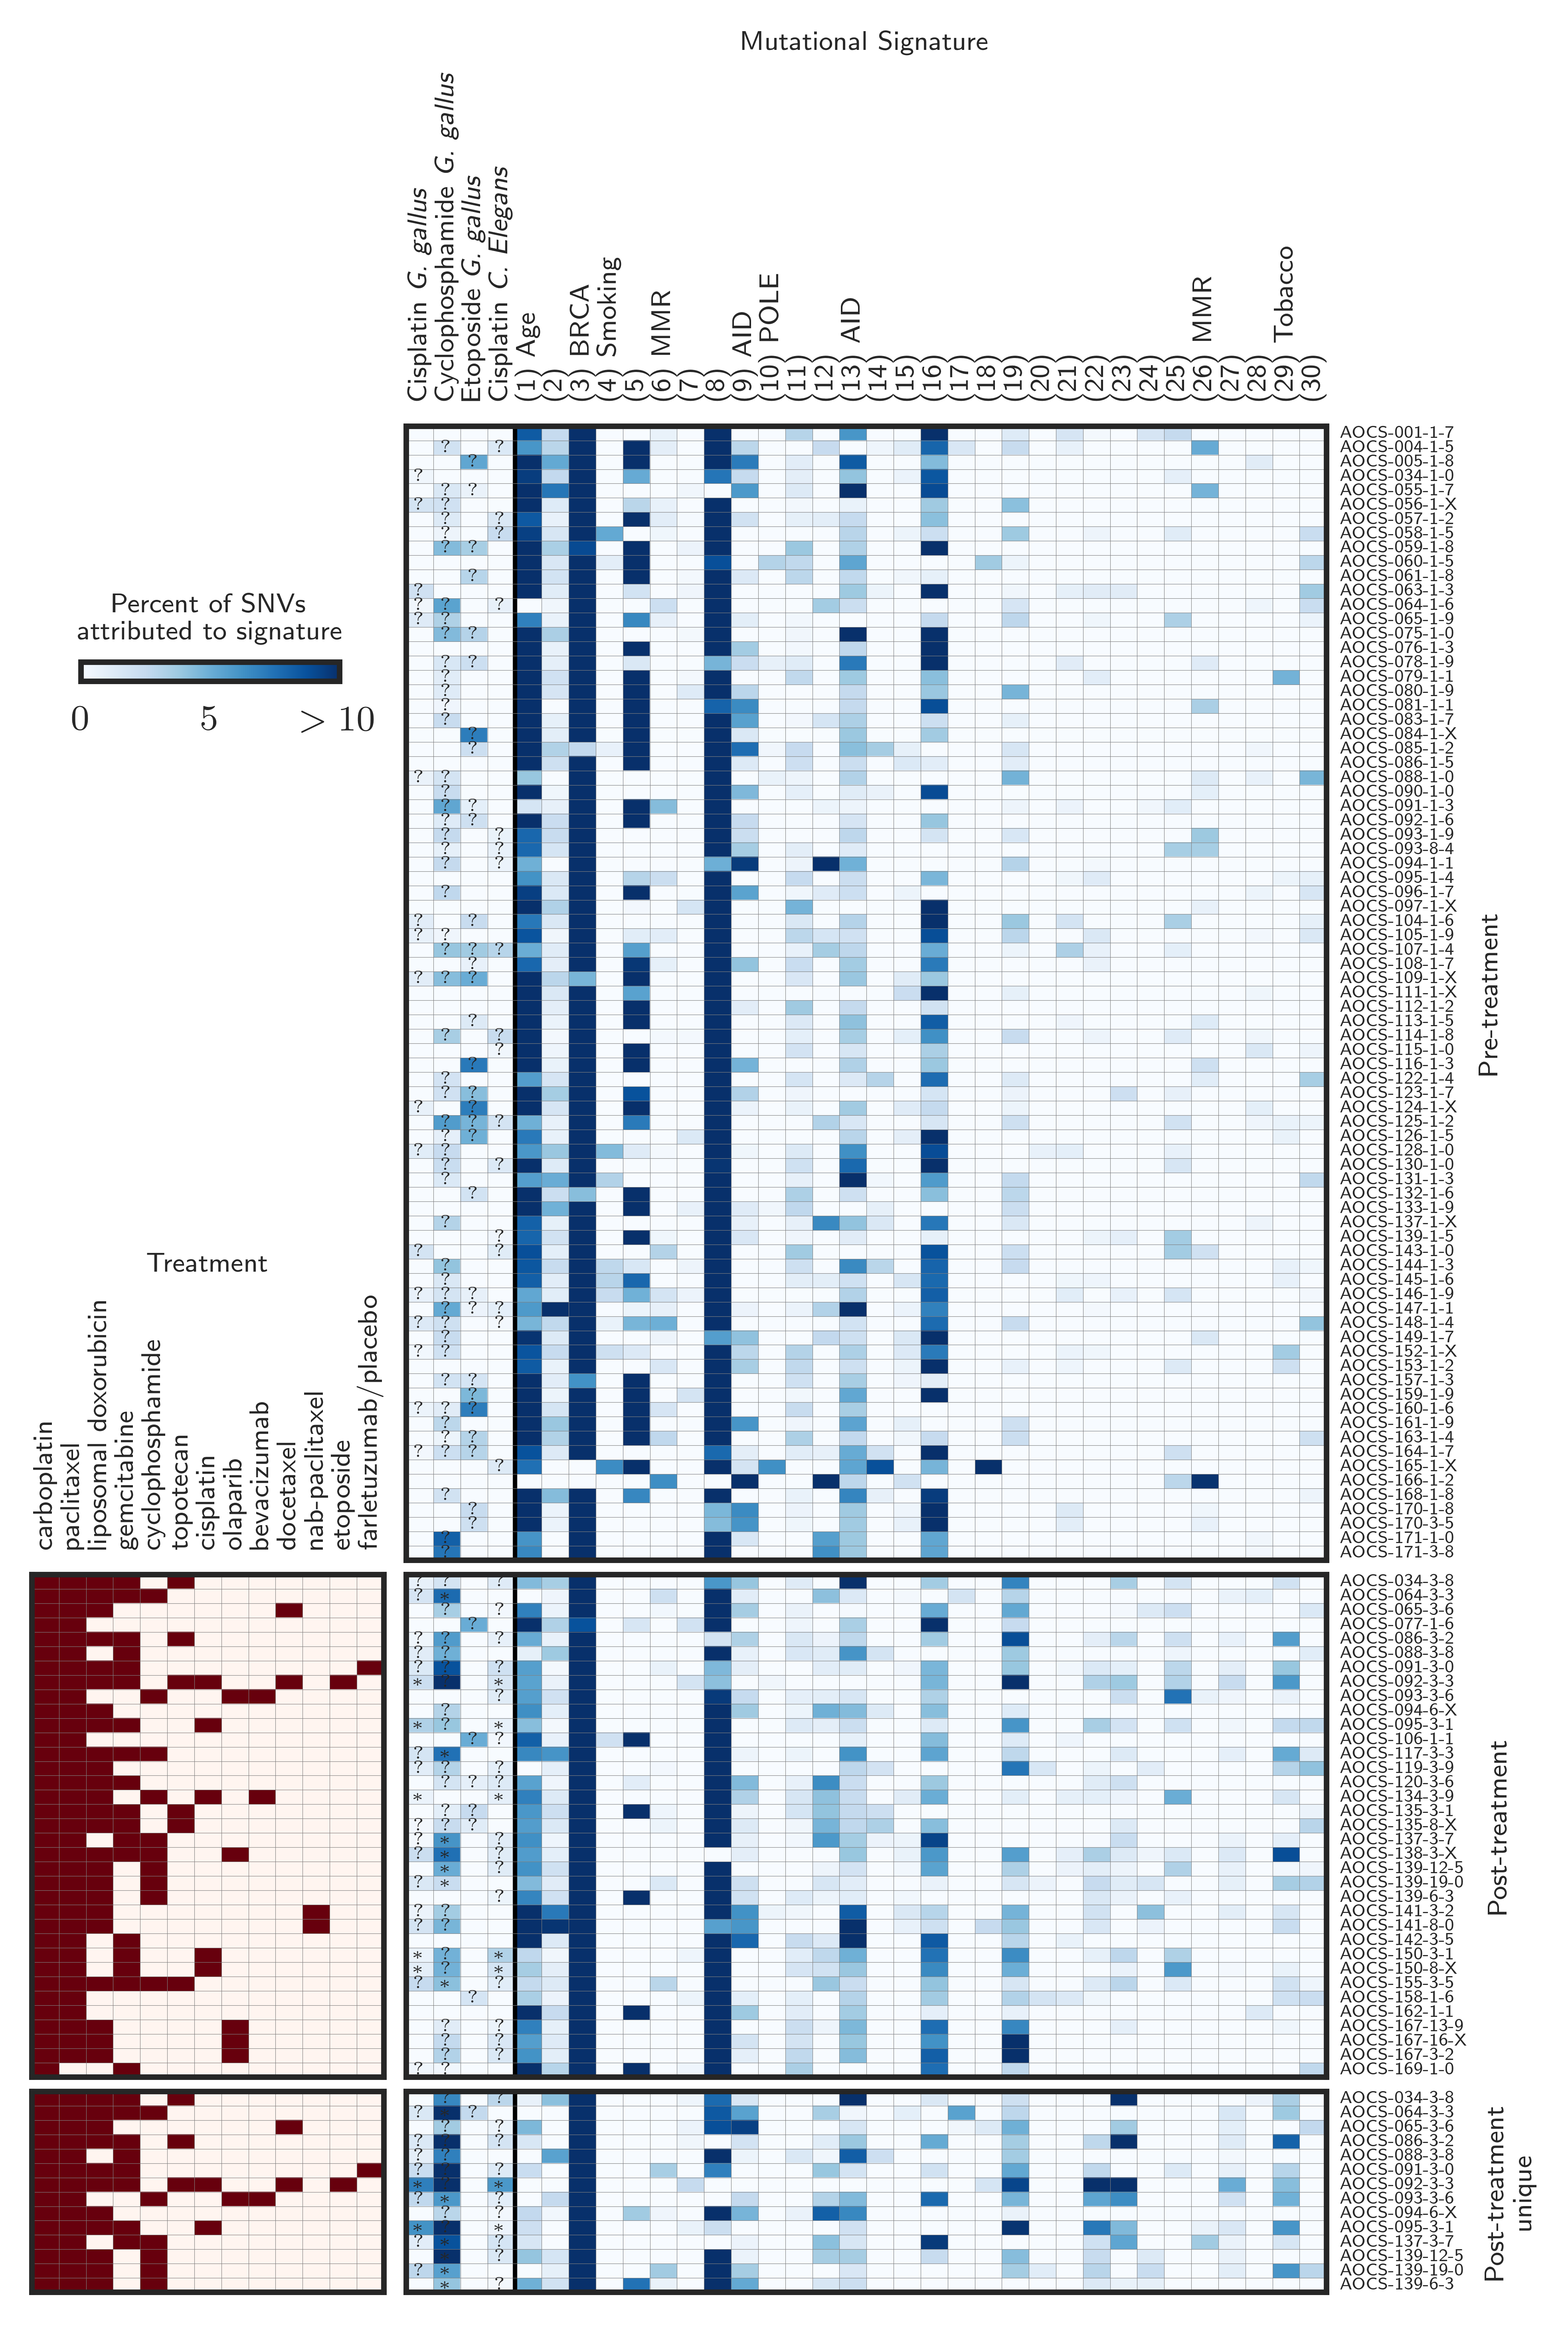

In [13]:
axs = draw_from_chunks([
#    ("Control", df.ix[(df.kind == "check")]),
    ("Pre-treatment", df.ix[(df.kind == "all") & (~df.treated)]),
    ("Post-treatment", (df.ix[(df.kind == "all") & (df.treated)])),
    ("Post-treatment\nunique", (df.ix[(df.kind == "new")]))
], figsize=(5,7.5), symbols=True, percent_cutoff=0.0, vmax=0.1, extra_signature_vlines=[3])
pyplot.tight_layout(h_pad=-7.2, w_pad=0.5)

pyplot.savefig("../figures/supplementary_signatures_no_cutoff.pdf")

Removing columns: Signature 4
[<matplotlib.gridspec.SubplotSpec object at 0x117c0d828>, <matplotlib.gridspec.SubplotSpec object at 0x117c0d898>, <matplotlib.gridspec.SubplotSpec object at 0x117c0d8d0>, <matplotlib.gridspec.SubplotSpec object at 0x117c0d940>]


/Users/tim/miniconda3/envs/py3k/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


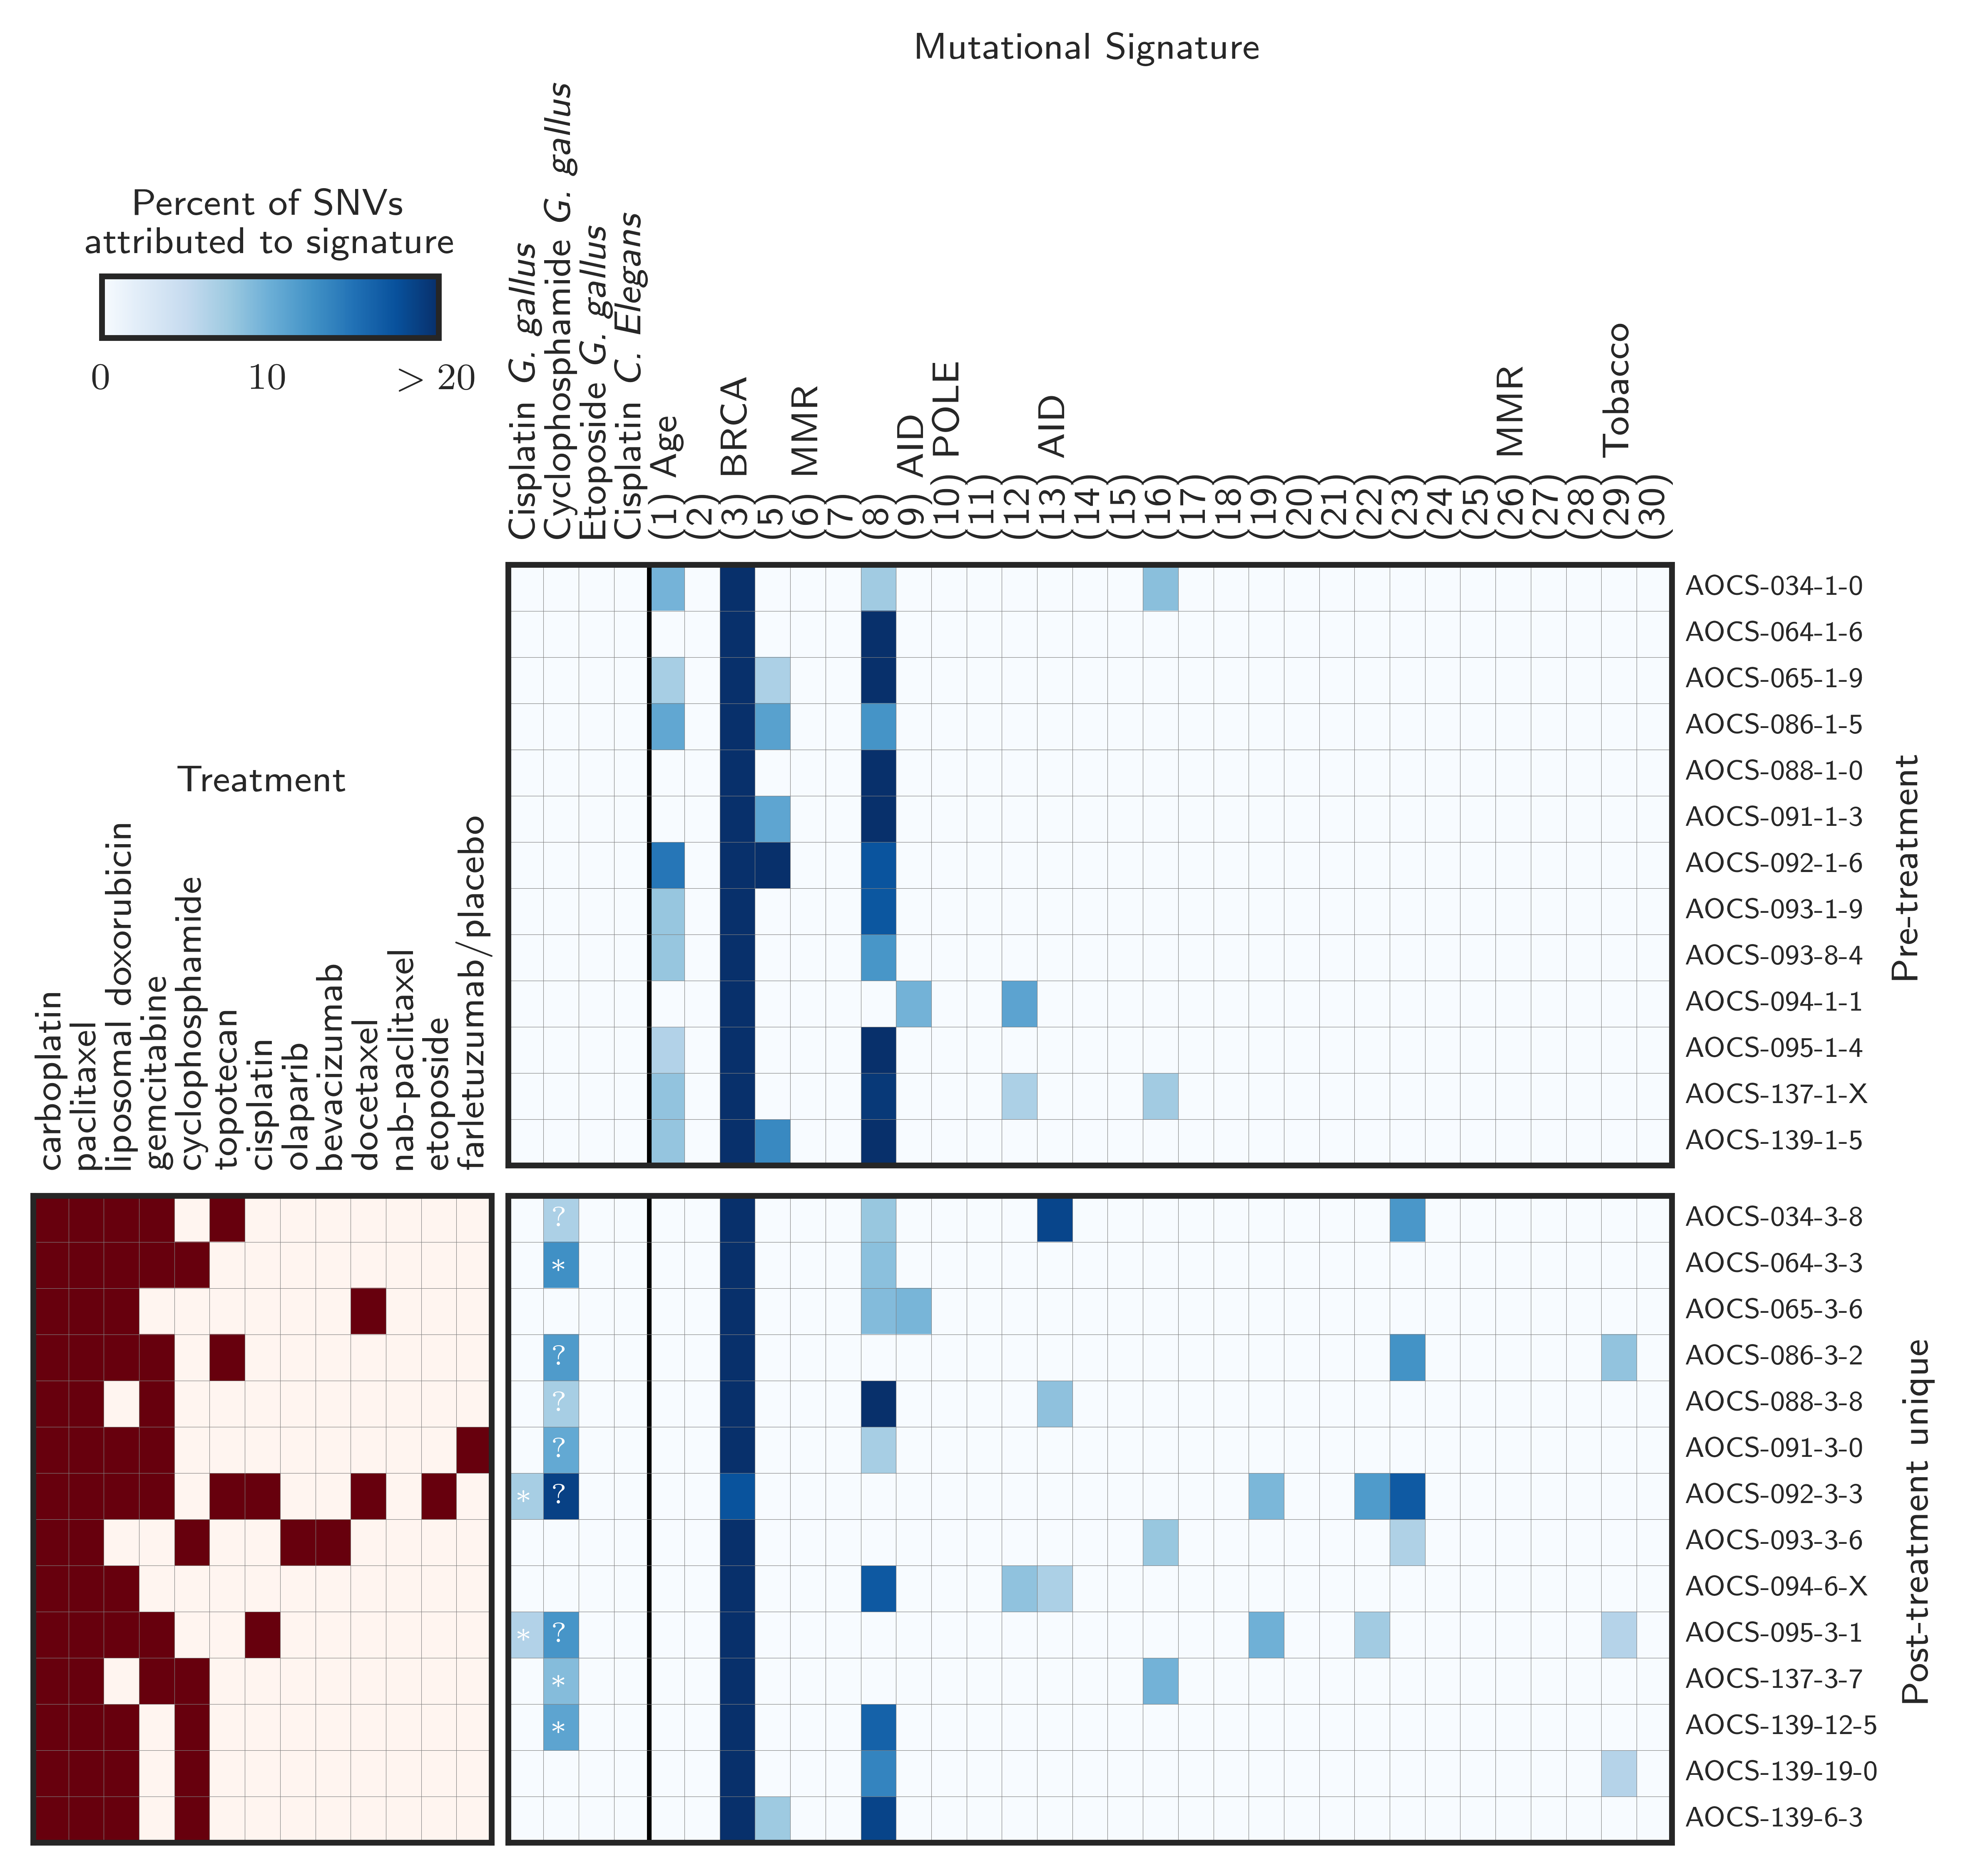

In [14]:
donors_with_new = set("-".join(x[0].split("-")[:2]) for x in df.ix[df.kind == "new"].index)
sub_df = df.ix[["-".join(x[0].split("-")[:2]) in donors_with_new for x in df.index]]
axs = draw_from_chunks([
#    ("Control", df.ix[(df.kind == "check")]),
    ("Pre-treatment", sub_df.ix[(sub_df.kind == "all") & (~sub_df.treated)]),
#    ("Post-treatment", (sub_df.ix[(sub_df.kind == "all") & (sub_df.treated)])),
    ("Post-treatment unique", (sub_df.ix[(sub_df.kind == "new")]))
],
                       figsize=(6,6),
                       cbar=True,
                       binarize=False,
                       percent_cutoff=6.0,
                       vmax=0.20,
                       cbar_bbox_to_anchor=(-0.125, 1.5, 1.05, 0.95),
                       symbols=True,
                       small_fontsize=6,
                       extra_signature_vlines=[3],
                       symbol_text_kwargs = {'color': 'white'})
pyplot.tight_layout(h_pad=-9.0, w_pad=0.3)
pyplot.savefig("../figures/signatures.pdf")


/Users/tim/miniconda3/envs/py3k/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


(0, 0.050000000000000003)

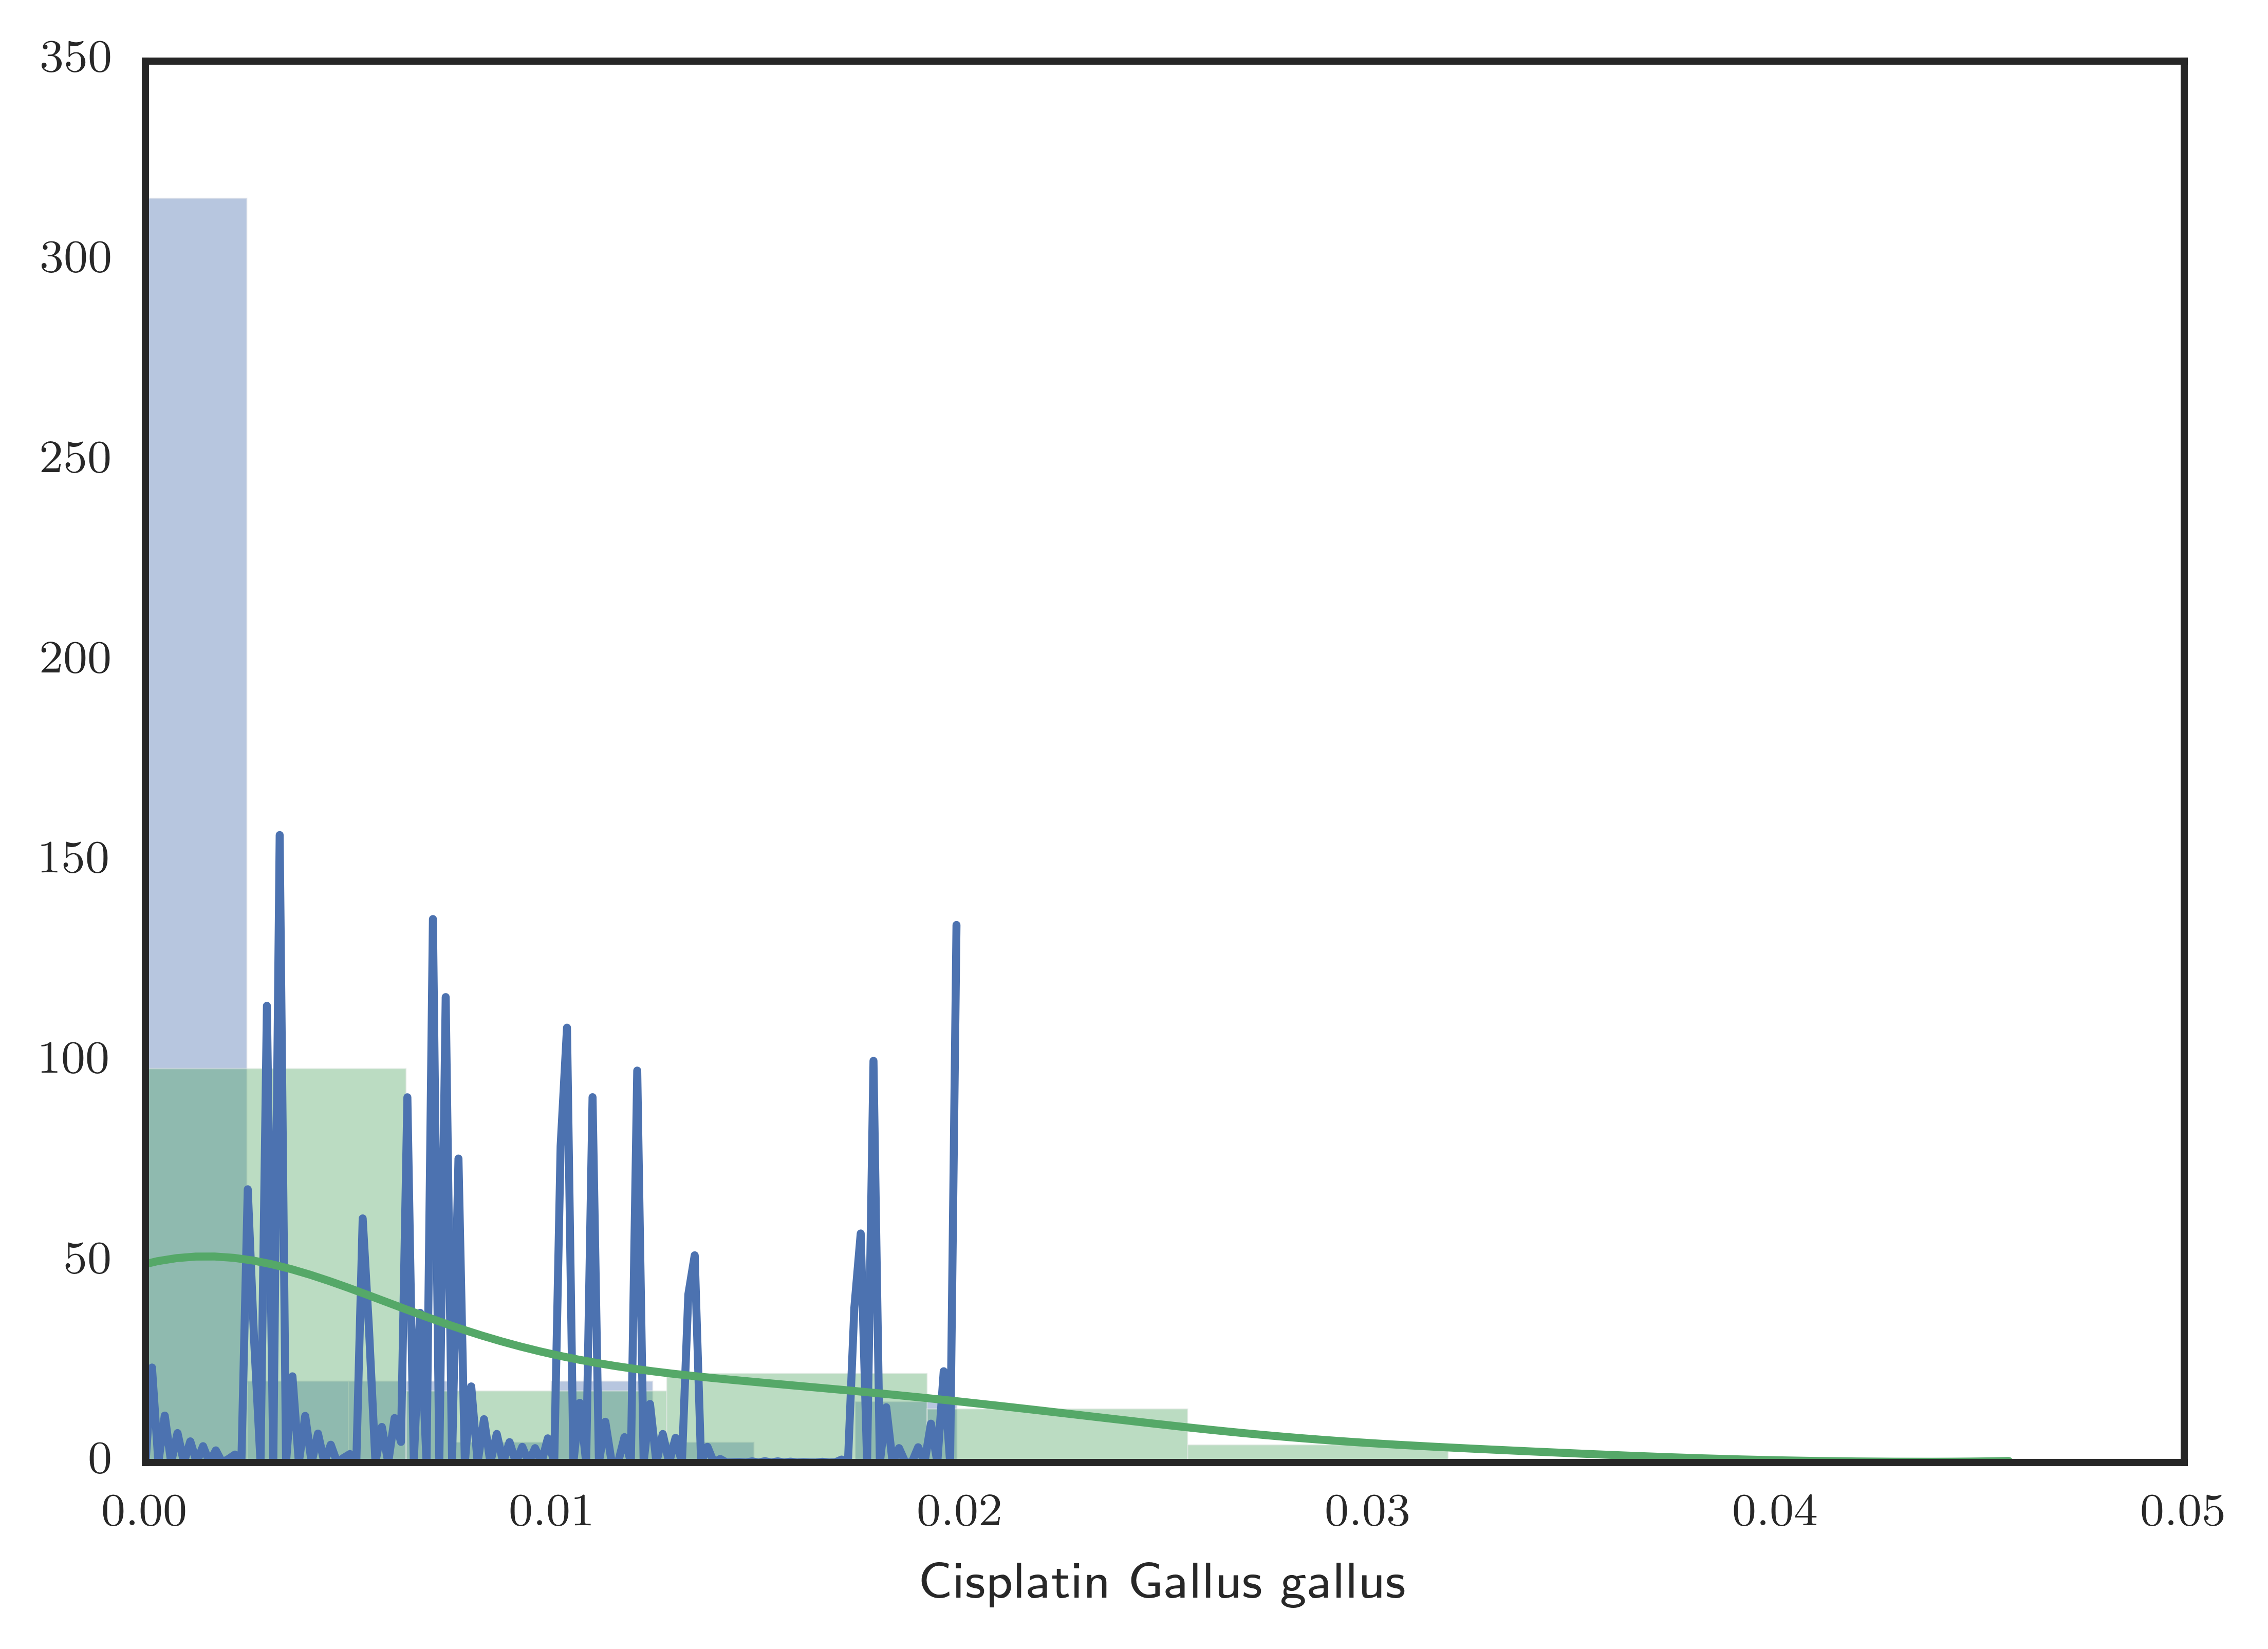

In [15]:
seaborn.distplot(df.ix[(df.kind == "all") & (~df.treated)]["Cisplatin Gallus gallus"])
seaborn.distplot(df.ix[(df.kind == "all") & (df.treated)]["Cisplatin Gallus gallus"])
pyplot.xlim(xmin=0)

/Users/tim/miniconda3/envs/py3k/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


(0, 0.20000000000000001)

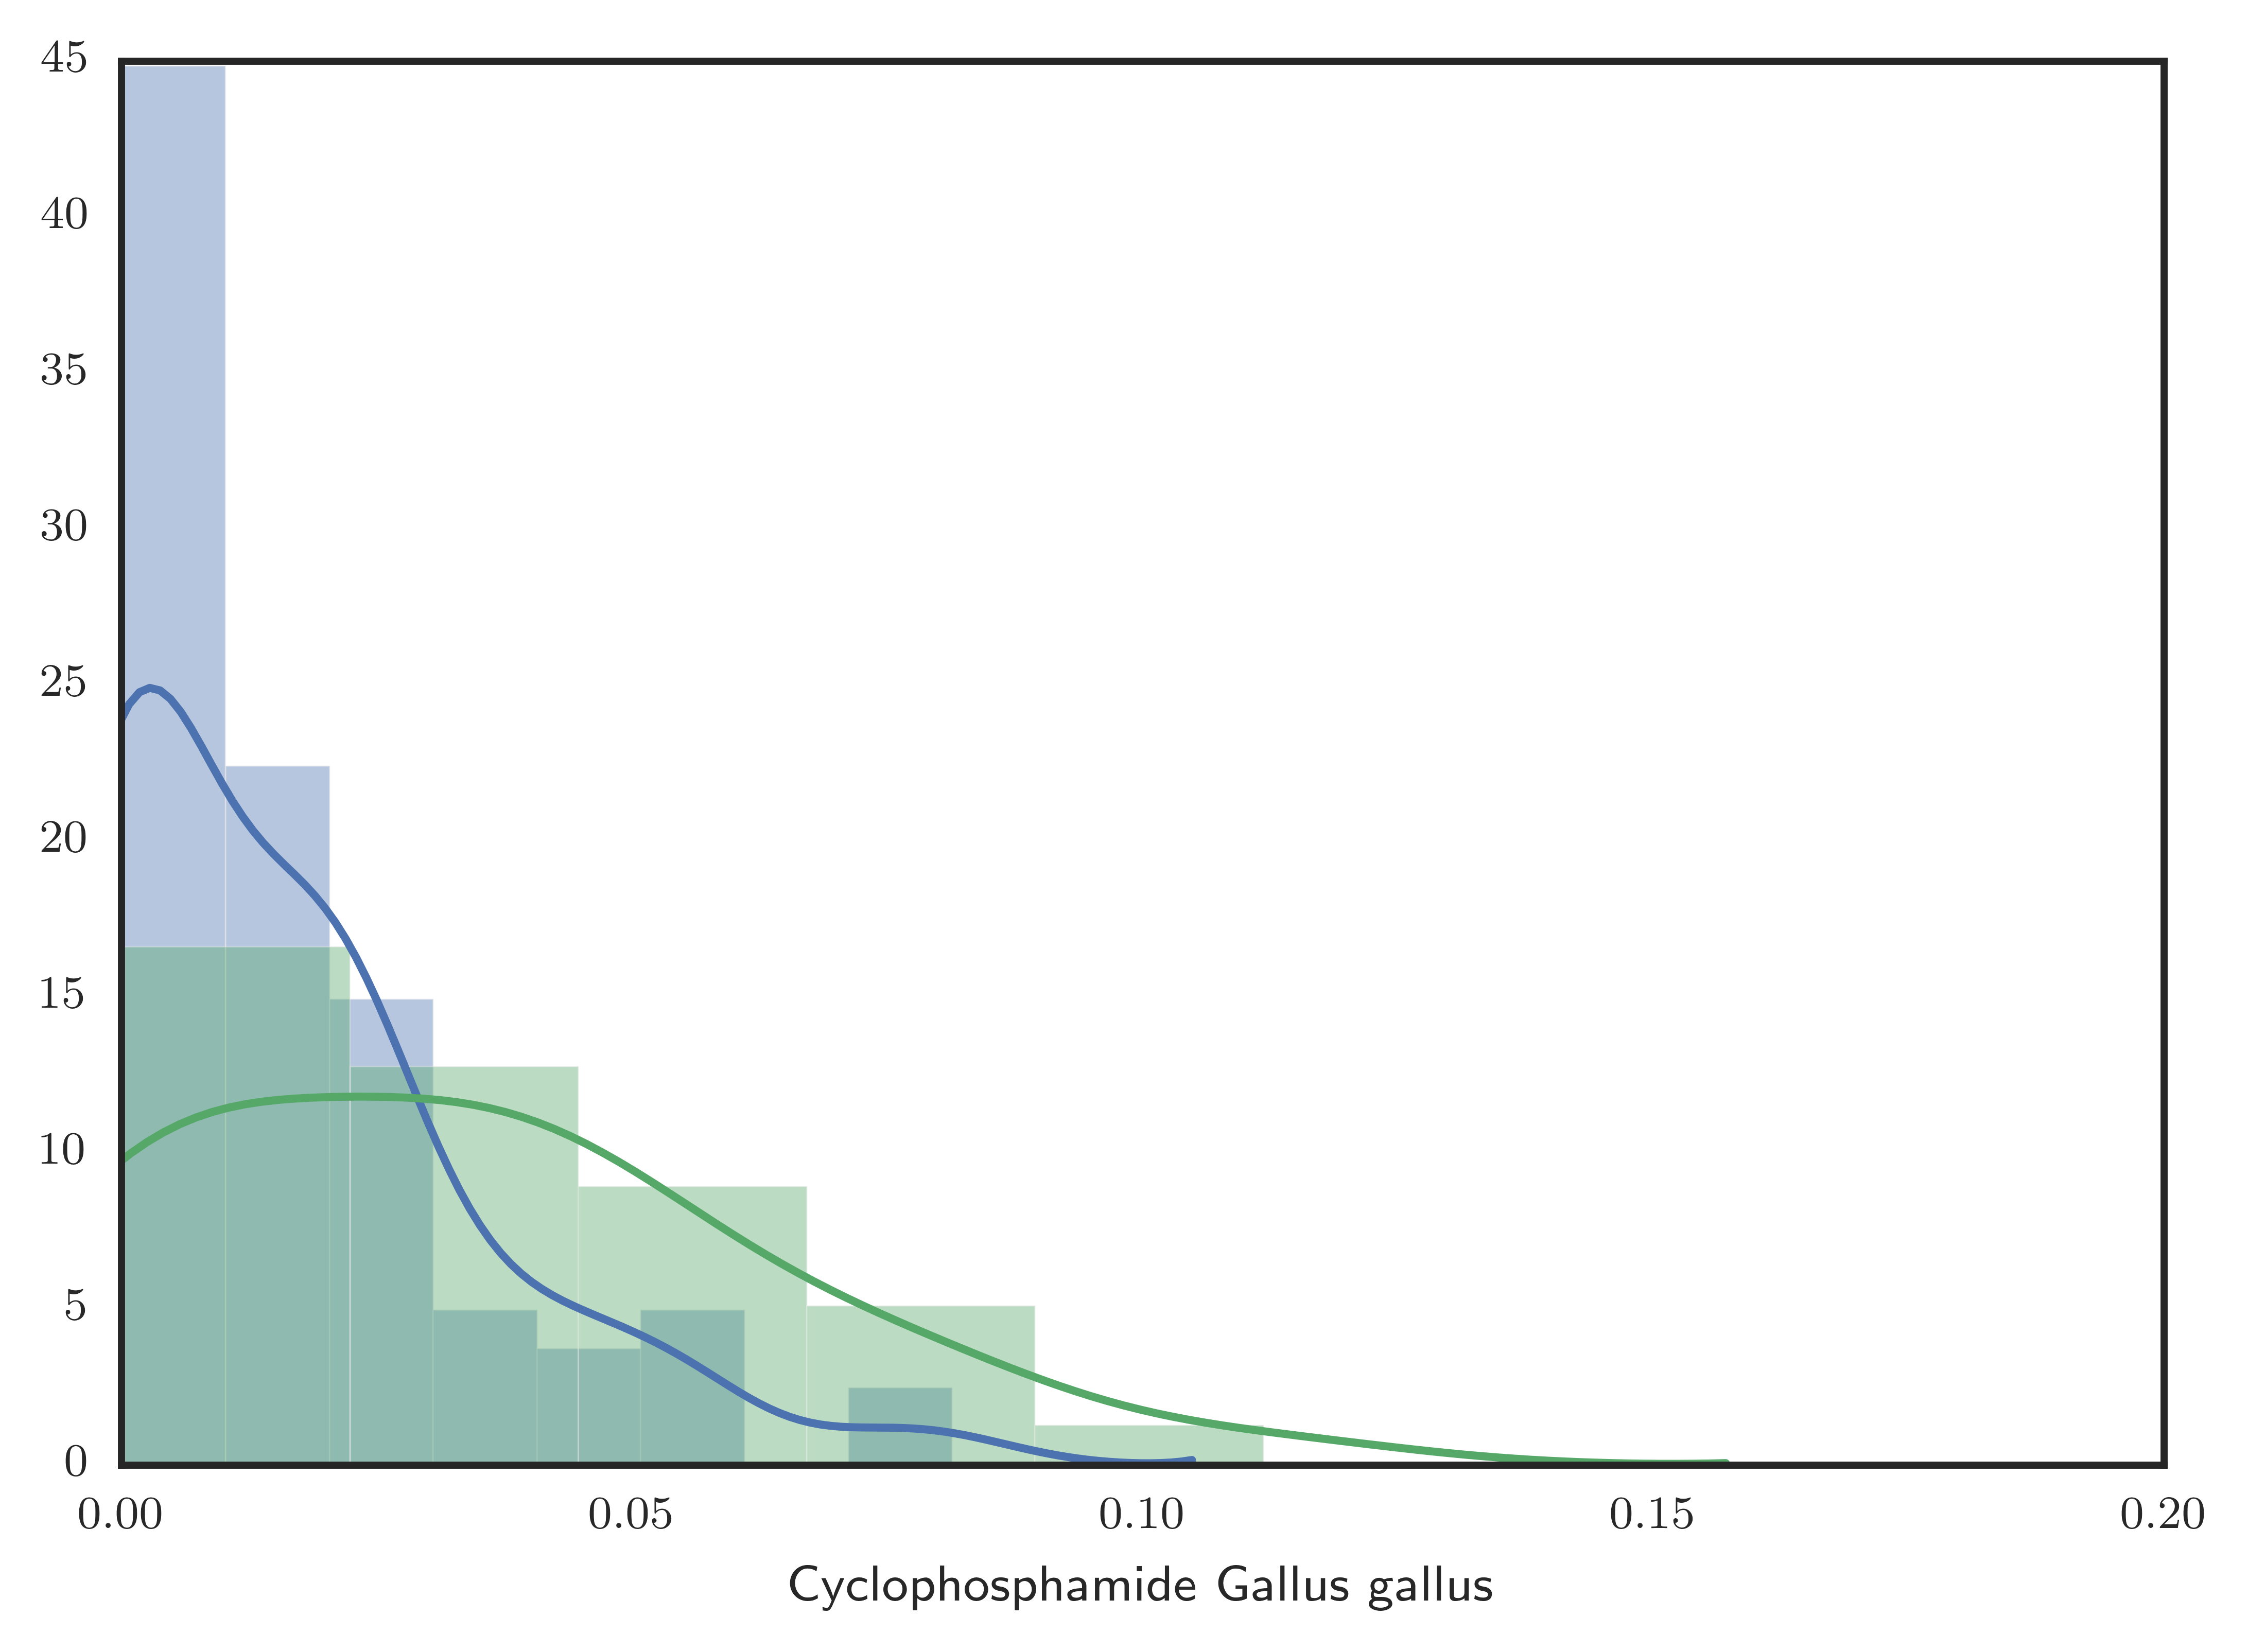

In [16]:
seaborn.distplot(df.ix[(df.kind == "all") & (~df.treated)]["Cyclophosphamide Gallus gallus"])
seaborn.distplot(df.ix[(df.kind == "all") & (df.treated)]["Cyclophosphamide Gallus gallus"])
pyplot.xlim(xmin=0)

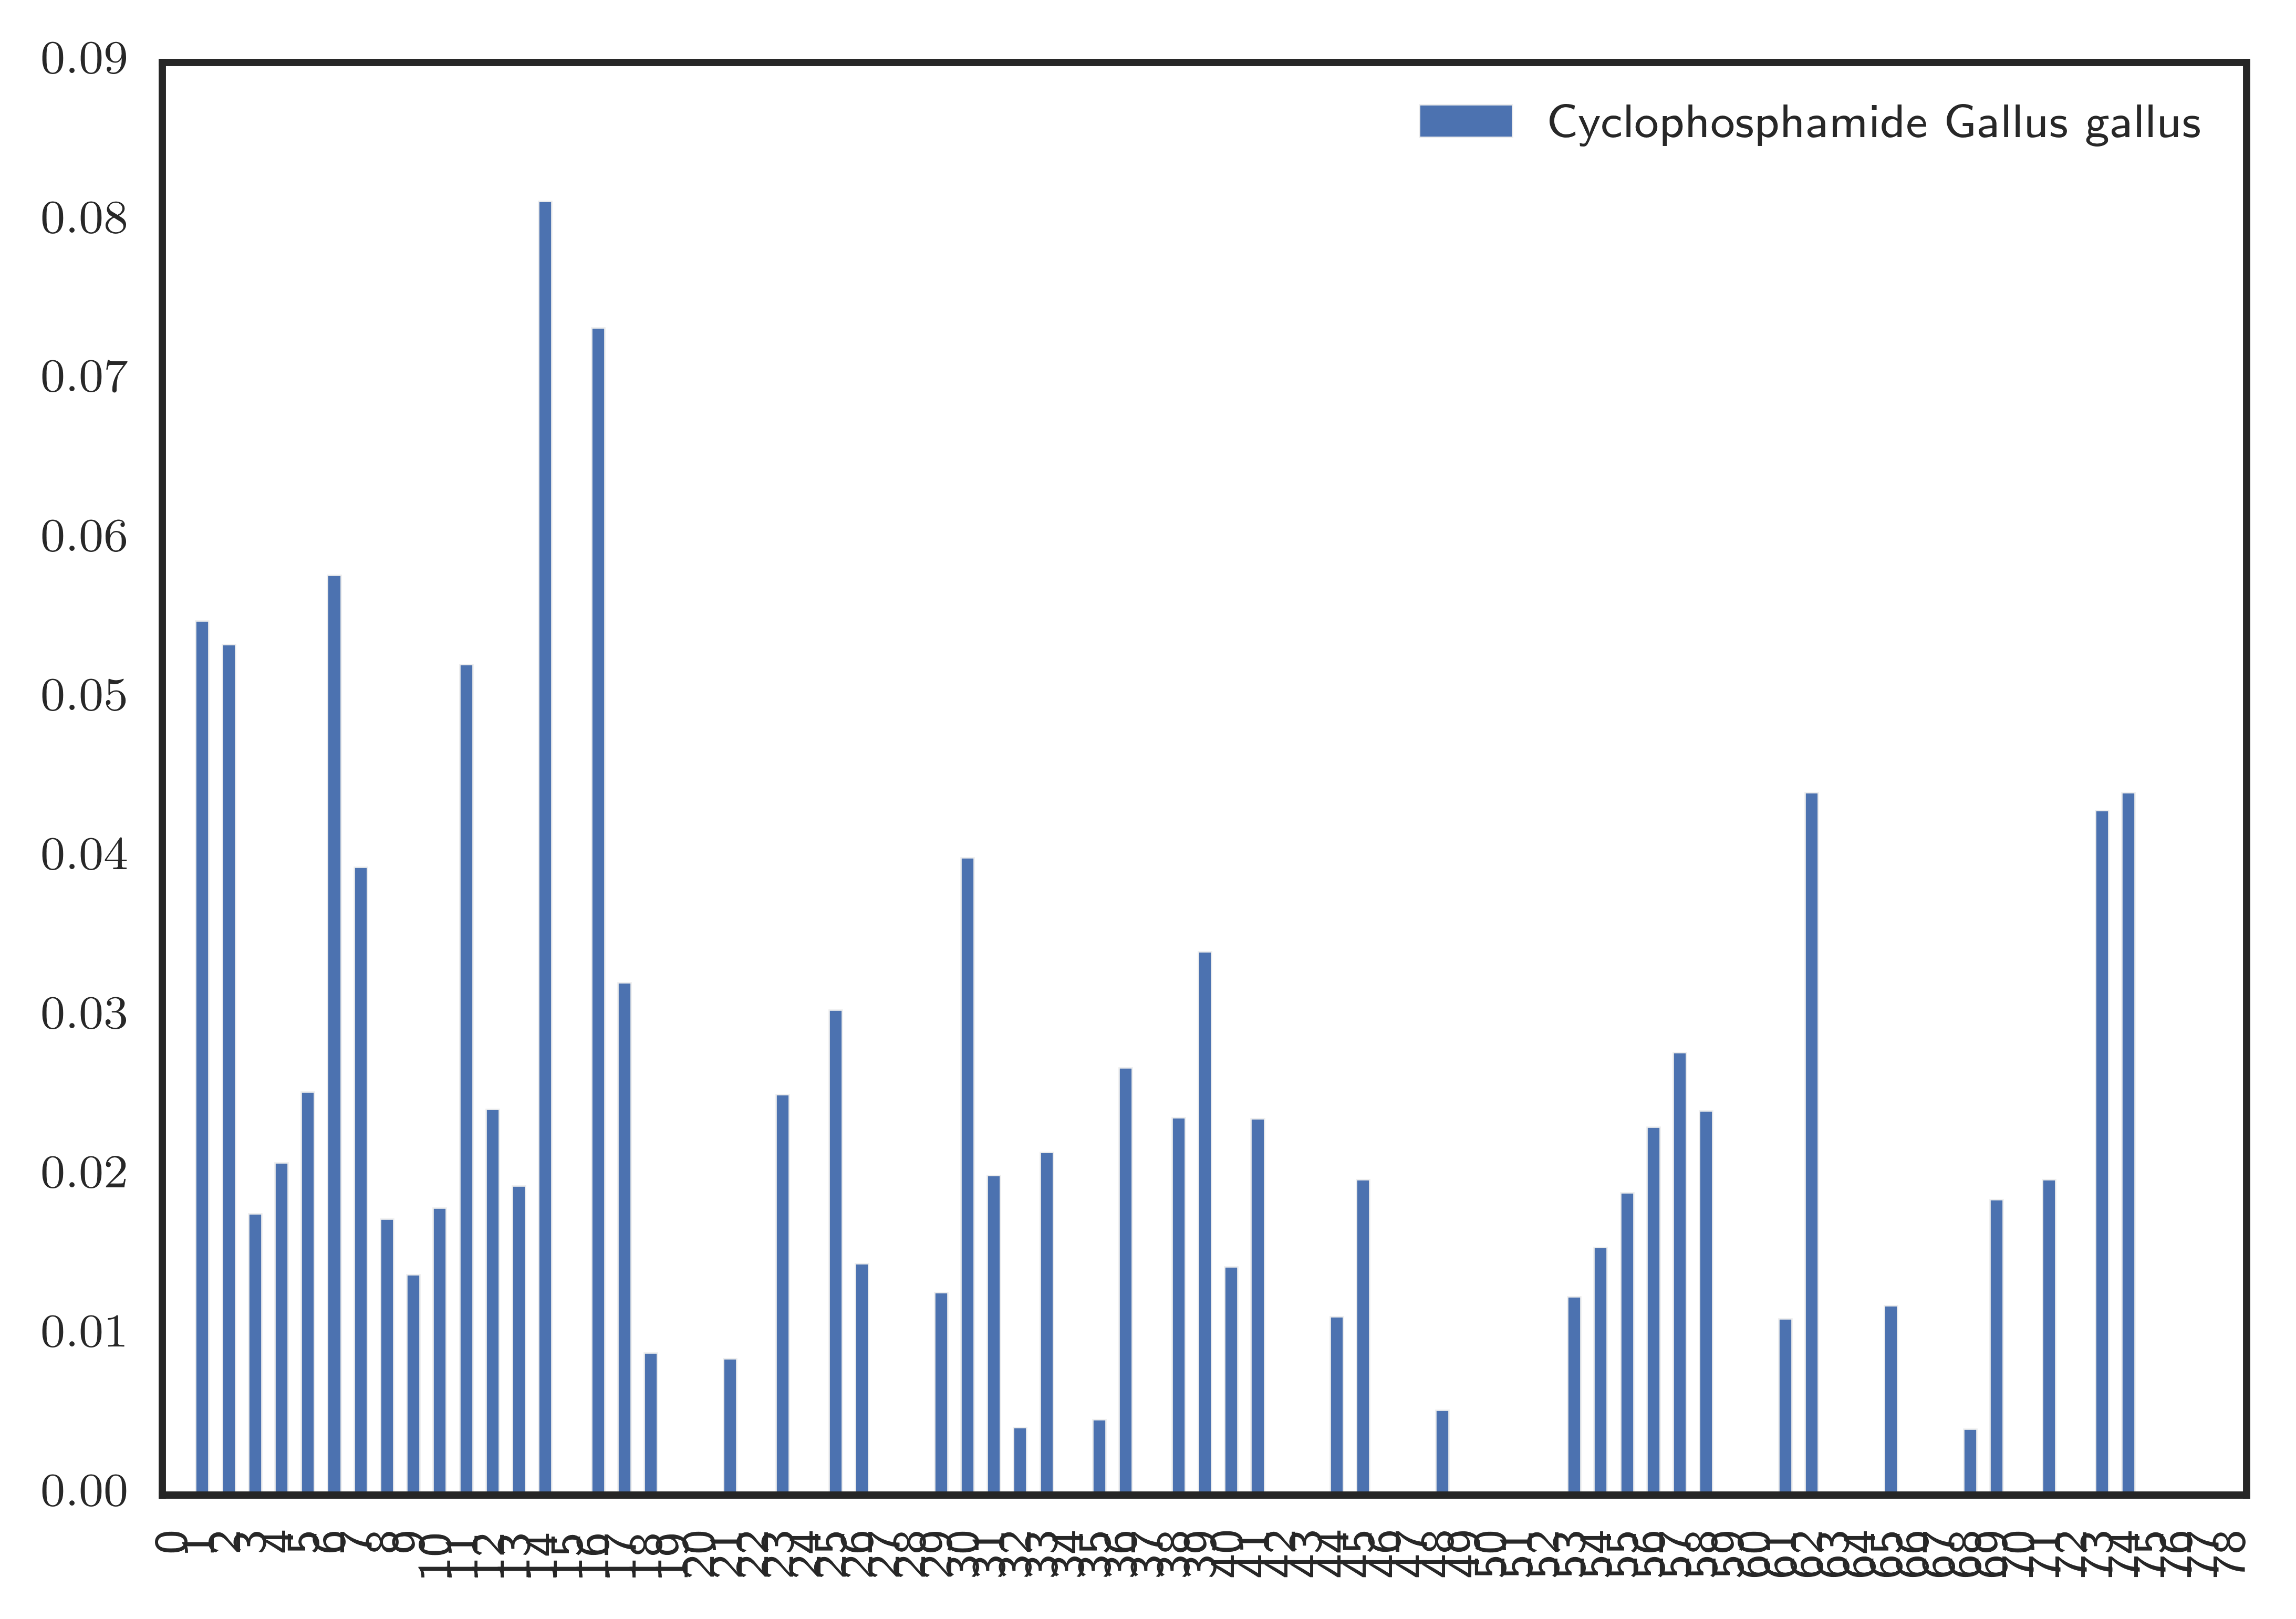

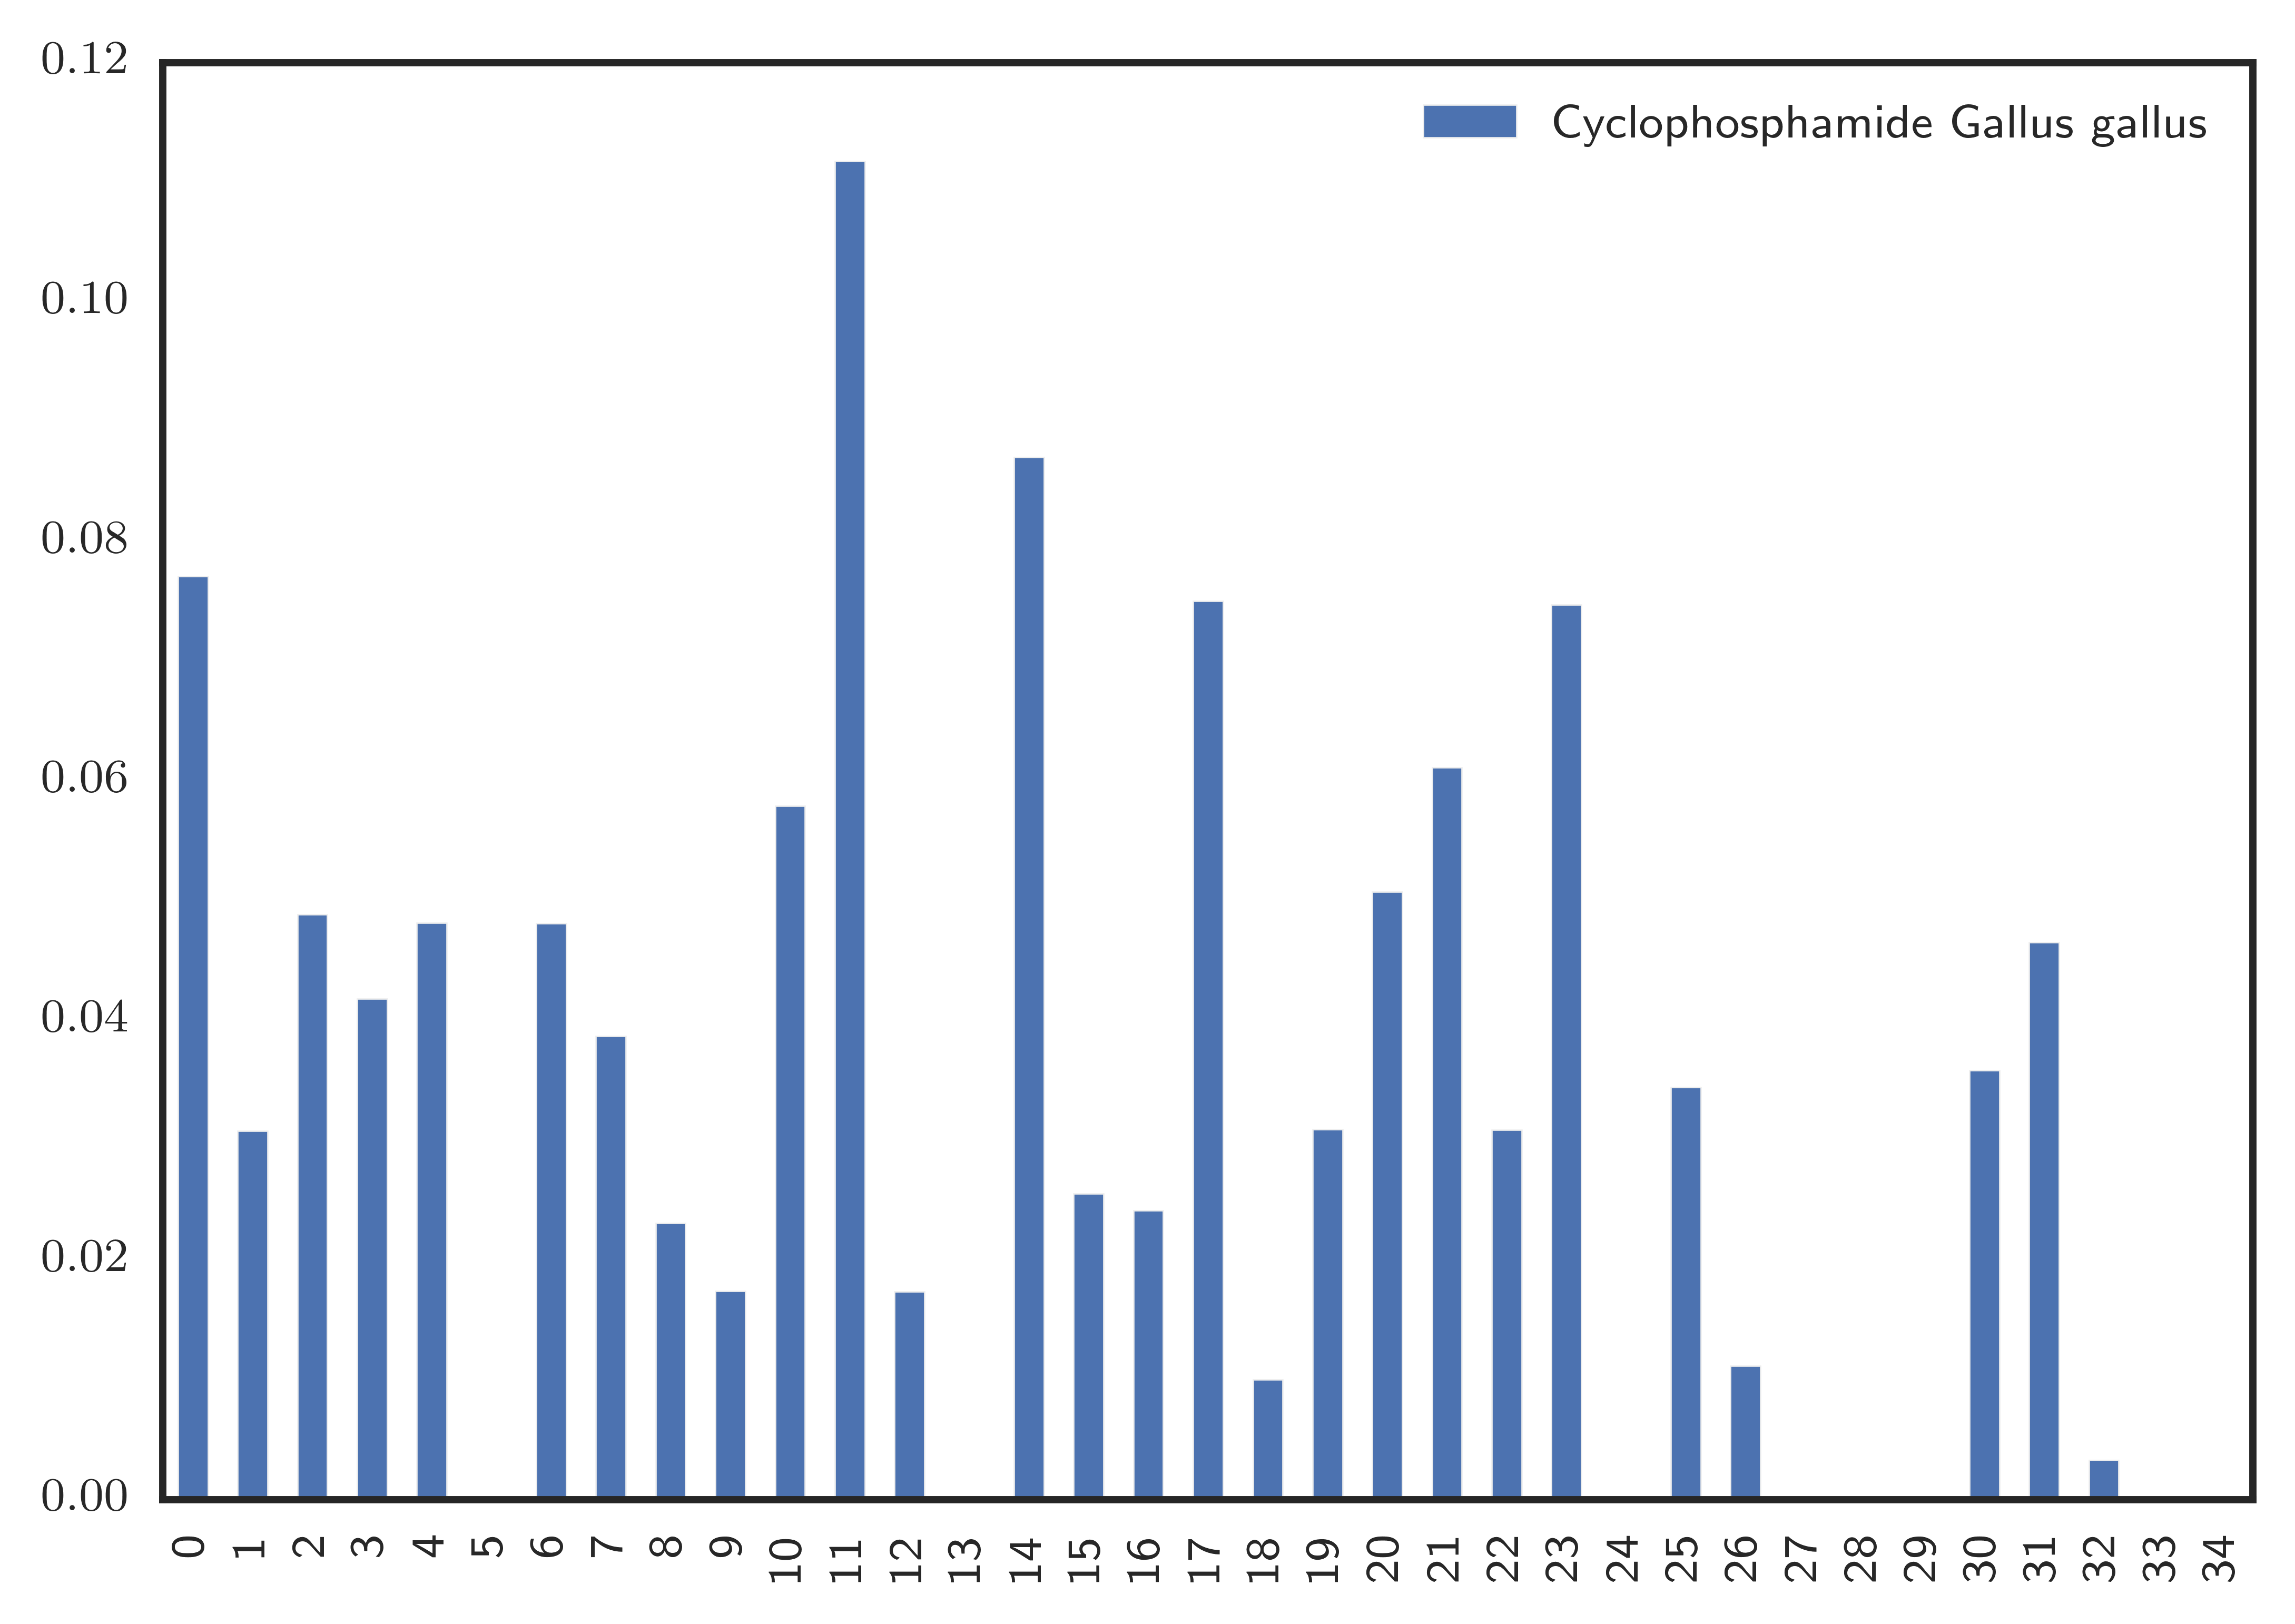

In [17]:
df.ix[(df.kind == "all") & (~df.treated)]["Cyclophosphamide Gallus gallus"].reset_index().plot(kind='bar', label='untreated')
df.ix[(df.kind == "all") & (df.treated)]["Cyclophosphamide Gallus gallus"].reset_index().plot(kind='bar', label='treated')
pyplot.legend()

In [18]:
df.ix[~df.treated][signatures].mean(0).sort(inplace=False, ascending=False)

/Users/tim/miniconda3/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  if __name__ == '__main__':


Signature 3                       0.340168
Signature 8                       0.190485
Signature 1                       0.127065
Signature 5                       0.092852
Signature 16                      0.064254
Signature 13                      0.038165
Signature 9                       0.019915
Signature 2                       0.017848
Cyclophosphamide Gallus gallus    0.016078
Signature 12                      0.013563
Etoposide Gallus gallus           0.012404
Signature 11                      0.011566
Signature 19                      0.008920
Signature 26                      0.005489
Signature 6                       0.004968
Signature 25                      0.004793
Signature 30                      0.004480
Signature 4                       0.004007
Signature 14                      0.003175
Signature 15                      0.002800
Cisplatin C Elegans               0.002622
Signature 18                      0.002485
Signature 21                      0.002082
Cisplatin G

In [19]:
for base_sigs in [["Signature 1"], ["Signature 3"], ["Signature 8"], ["Signature 1", "Signature 3", "Signature 8"]]:
    print(base_sigs)
    print("All",
        mean_with_errorbars(df.ix[(df.kind == "all")][base_sigs].sum(1), decimals=3))
    print("Treated",
        mean_with_errorbars(df.ix[(df.kind == "all") & (df.treated)][base_sigs].sum(1), decimals=3))
    print("Untreated",
        mean_with_errorbars(df.ix[(df.kind == "all") & (~df.treated)][base_sigs].sum(1), decimals=3))
    print("New",
        mean_with_errorbars(df.ix[(df.kind == "new") & (df.treated)][base_sigs].sum(1), decimals=3))
    print("")


['Signature 1']
All 0.112 (0.100 - 0.124)
Treated 0.078 (0.059 - 0.098)
Untreated 0.127 (0.113 - 0.142)
New 0.017 (0.010 - 0.025)

['Signature 3']
All 0.362 (0.338 - 0.384)
Treated 0.410 (0.376 - 0.443)
Untreated 0.340 (0.311 - 0.369)
New 0.462 (0.416 - 0.501)

['Signature 8']
All 0.189 (0.175 - 0.203)
Treated 0.187 (0.159 - 0.217)
Untreated 0.190 (0.175 - 0.207)
New 0.093 (0.055 - 0.133)

['Signature 1', 'Signature 3', 'Signature 8']
All 0.663 (0.644 - 0.680)
Treated 0.675 (0.652 - 0.696)
Untreated 0.658 (0.632 - 0.682)
New 0.573 (0.506 - 0.635)



In [20]:
df.columns

Index(['Signature 1', 'Signature 2', 'Signature 3', 'Signature 4',
       'Signature 5', 'Signature 6', 'Signature 7', 'Signature 8',
       'Signature 9', 'Signature 10', 'Signature 11', 'Signature 12',
       'Signature 13', 'Signature 14', 'Signature 15', 'Signature 16',
       'Signature 17', 'Signature 18', 'Signature 19', 'Signature 20',
       'Signature 21', 'Signature 22', 'Signature 23', 'Signature 24',
       'Signature 25', 'Signature 26', 'Signature 27', 'Signature 28',
       'Signature 29', 'Signature 30', 'Cisplatin Gallus gallus',
       'Cyclophosphamide Gallus gallus', 'Etoposide Gallus gallus',
       'Cisplatin C Elegans', 'kind', 'source_id', 'treated'],
      dtype='object')

In [21]:
df.ix[df["Cisplatin Gallus gallus"] > 0]

Signature 1  Signature 2  Signature 3  Signature 4  \
source_id     kind                                                       
AOCS-092-3-3  new      0.000000     0.000000     0.173333     0.000000   
AOCS-064-3-3  new      0.000000     0.000000     0.512506     0.000000   
AOCS-064-1-6  all      0.000000     0.003423     0.428518     0.000000   
AOCS-064-3-3  all      0.000000     0.004057     0.476215     0.000000   
AOCS-139-19-0 new      0.000000     0.008265     0.489320     0.000000   
AOCS-119-3-9  all      0.000000     0.008636     0.260254     0.000000   
AOCS-093-3-6  new      0.000000     0.025292     0.467042     0.000000   
AOCS-088-3-8  new      0.000000     0.055241     0.385917     0.000000   
              all      0.008323     0.037319     0.369055     0.000000   
AOCS-086-3-2  new      0.015515     0.000000     0.435691     0.000000   
AOCS-137-3-7  new      0.016137     0.000000     0.578405     0.000000   
AOCS-095-3-1  new      0.021304     0.000000     0.443105     0.000000   
AOCS-091-3-0  new      0.023119     0.000000     0.527736     0.000000   
AOCS-155-3-5  all      0.025644     0.013027     0.448770     0.000000   
AOCS-150-3-1  all      0.026929     0.003161     0.369160     0.000000   
AOCS-150-8-X  all      0.034918     0.009651     0.466655     0.000000   
AOCS-088-1-0  all      0.038741     0.000000     0.347385     0.000000   
AOCS-095-3-1  all      0.042758     0.001633     0.409266     0.000000   
AOCS-139-19-0 all      0.044201     0.011156     0.488808     0.000000   
AOCS-034-3-8  all      0.044497     0.034413     0.493021     0.000000   
AOCS-148-1-4  all      0.046769     0.026446     0.403727     0.006888   
AOCS-086-3-2  all      0.050795     0.007572     0.526141     0.000000   
AOCS-146-1-9  all      0.053096     0.010768     0.455554     0.023457   
AOCS-092-3-3  all      0.055025     0.006622     0.371879     0.000000   
AOCS-091-3-0  all      0.056399     0.001993     0.545424     0.000000   
AOCS-135-8-X  all      0.057324     0.013715     0.310049     0.000000   
AOCS-138-3-X  all      0.057807     0.009254     0.477926     0.000000   
AOCS-128-1-0  all      0.060095     0.038546     0.387467     0.043867   
AOCS-137-3-7  all      0.063279     0.004669     0.485444     0.000000   
AOCS-117-3-3  all      0.066321     0.061233     0.244649     0.000000   
AOCS-065-1-9  all      0.068835     0.006987     0.455608     0.000000   
AOCS-134-3-9  all      0.069134     0.012587     0.455488     0.000000   
AOCS-104-1-6  all      0.072250     0.014738     0.412477     0.000000   
AOCS-152-1-X  all      0.086002     0.024597     0.452037     0.020461   
AOCS-105-1-9  all      0.086289     0.003353     0.423153     0.000000   
AOCS-164-1-7  all      0.087050     0.012507     0.537108     0.000000   
AOCS-143-1-0  all      0.088275     0.009037     0.342773     0.000000   
AOCS-034-1-0  all      0.094747     0.026048     0.577138     0.000000   
AOCS-063-1-3  all      0.108109     0.010866     0.340220     0.000000   
AOCS-056-1-X  all      0.110594     0.012215     0.481762     0.000000   
AOCS-141-3-2  all      0.172423     0.071664     0.270434     0.000000   
AOCS-160-1-6  all      0.175897     0.016909     0.191099     0.000000   
AOCS-141-8-0  all      0.176322     0.097878     0.296674     0.000000   
AOCS-169-1-0  all      0.207259     0.029598     0.240886     0.000000   
AOCS-124-1-X  all      0.263824     0.016589     0.114860     0.000000   
AOCS-109-1-X  all      0.295124     0.028497     0.046574     0.000000   

                     Signature 5  Signature 6  Signature 7  Signature 8  \
source_id     kind                                                        
AOCS-092-3-3  new   0.000000e+00     0.000000     0.024844     0.000000   
AOCS-064-3-3  new   0.000000e+00     0.000000     0.000000     0.084197   
AOCS-064-1-6  all   0.000000e+00     0.021782     0.000000     0.377967   
AOCS-064-3-3  all   1.688148e-08     0.020668     0.000000     0.274323   
AOCS-139-19-0 new